In [96]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
from mpltools import annotation
import scipy.linalg as sl
import scipy.sparse as sp
import scipy.sparse.linalg as spla

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-RK2-family-of-ODE-solvers" data-toc-modified-id="The-RK2-family-of-ODE-solvers-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The RK2 family of ODE solvers</a></span></li><li><span><a href="#Solving-the-unsteady-advection-diffusion-equation-using-the-finite-difference-method" data-toc-modified-id="Solving-the-unsteady-advection-diffusion-equation-using-the-finite-difference-method-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Solving the unsteady advection-diffusion equation using the finite difference method</a></span></li><li><span><a href="#Solving-the-unsteady-advection-diffusion-equation-using-the-finite-element-method" data-toc-modified-id="Solving-the-unsteady-advection-diffusion-equation-using-the-finite-element-method-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Solving the unsteady advection-diffusion equation using the finite element method</a></span></li></ul></div>

# Q1.1 Implement RK2 family of ODE solvers

In [155]:
def RK2_alpha(f, y0, t0, t_max, dt, alpha):
    """ RK2 time-stepper.
    f = f(t,y) is the RHS function.
    y0 is the initial condition.
    t0 is the initial time; t_max is the end time.
    dt is the time step size.
    alpha is free paramater 
    returns: np.array of solution for every timestep
             np.array of all timesteps
    """ 
     # Initialize list for y and t with initial condition
    t_all = [t0]
    y_all = [y0]
    while t_all[-1] < t_max: #continue calculation until last t_end  is reached 
        k1 = f(t_all[-1], y_all[-1]) # calculate k1
        k2 = f(t_all[-1] + alpha*dt, y_all[-1] + alpha*k1*dt) #calculate k2
        y = y_all[-1] + (1 - (1/(2*alpha)))*dt*k1 + (1/(2*alpha))*dt*k2 #calculate new y using k1 and k2
        y_all.append(y) #append new y to list
        t_all.append(t_all[-1] + dt) #advance time and append to list
    return np.array(y_all), np.array(t_all)

The stability of the RK2 method can be determined for a test problem with will behaviour the same as the original problem. The test problem is:
$$ y' = y$$

The amplication factor for the RK2 method [1] is given by:

$$\sigma = \left( 1 + \lambda \Delta t + \frac{\lambda^2\Delta t^2}{2}\right).$$

The $\lambda$ depends on the test problem that is solved, in this case it can be taken as: 

$$ \lambda = 1 $$

For the solution to be stable, the amplication factor needs to be smaller than 1:

$$\left|\left( 1 + \lambda \Delta t + \frac{\lambda^2\Delta t^2}{2}\right)\right| = \left|\left( 1 + 1 \Delta t + \frac{(1)^2\Delta t^2}{2}\right)\right| <1 $$

$$ -1 < \left( 1 + 1 \Delta t + \frac{1^2\Delta t^2}{2}\right) <1$$

$$ -2 < \left(1 \Delta t + \frac{1^2\Delta t^2}{2}\right) <0$$

$\Delta t$ is always positive, therefore the above equality can never be satisfied which means that the RK2 method will always be unstable regardless of the timestep size. This is because the solution to the test problem itself is not stable and tends to infinity. The original test problem has the same behaviour, and it will tend to infinity even faster since it also includes a factor of $t^3$.

This means the timestep size dt must be chosen to minimize the error rather than give a stable solution. For a very simple estimate of the global error the truncation error of the Taylor series can be used which is of the order $O(dt^2)$. This means for a global error of 0.0001 a timestep of 0.01 seconds must be used. The timestep can be adapted to whatever global error is required.

Text(0.5, 1.0, 'RK2 solution to origin problem with two different dt')

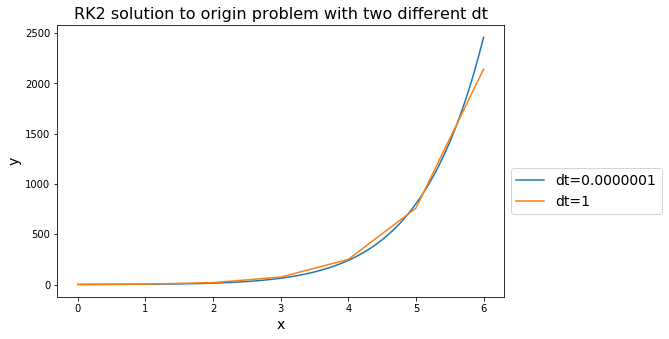

In [160]:
y0 = 1.0
t0 = 0.0
t_end = 6

y_RK2_0, t_RK2_0 = RK2_alpha(f_1_3, y0, t0, t_end,0.0000001 , 2)
y_RK2_1, t_RK2_1 = RK2_alpha(f_1_3, y0, t0, t_end, 1, 2)

fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))

ax1.plot(t_RK2_0, y_RK2_0, label= 'dt=0.0000001')
ax1.plot(t_RK2_1, y_RK2_1, label= 'dt=1')

ax1.legend(loc='upper left', bbox_to_anchor=(1, 0.5), fontsize=14)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_title('RK2 solution to origin problem with two different dt', fontsize=16)

The graph above shows the RK2 solution and as expected it blows up regardless of the timestep used, even for a very small dt the solution will tend to infinity. 

# Q1.2 Prove RK2 ODE solver is improved Euler method for $\alpha=1$

The imporved Euler method can be written as:
\begin{align*}
    y^* &= y_{n} + \Delta t {f}(t_{n},{y}_{n}), \\[5pt]
    y_{n+1} &= y_{n} + \frac{1}{2} \Delta t \left({f}(t_{n},{y}_{n}) + {f}(t_{n+1},{y}^*)\right).
\end{align*}

From the general equations of the RK2 family of ODE solver, the imporved Euler method can be obtained by subsituting $\alpha = 1$ in.
$ k_1 $ is not dependent on $\alpha$, therefore it remains the same:
$$ k_1 =  f(t_n, y_n) $$
$ k_2 $ is dependent on $\alpha$, therefore subsituting $\alpha = 1$ in the $ k_2 $ equations yields an expression for $ k_2 $ which is dependent on $y*$ and $t_{n+1}$:

\begin{align*}
k_2 =  f(t_n + \alpha \Delta t, y_n + \alpha\,\Delta t\, k_1) = f(t_n + \Delta t, y_n + \Delta t\, k_1) = f(t_{n+1}, y_n + \Delta t\, f(t_n, y_n))= f(t_{n+1}, y^*) 
\end{align*}

Subing in the questioins for $ k_1 $ and $ k_2 $ in the RK2 equation for $y_{n+1}$ yields:

\begin{align*}
y_{n+1} = y_n + \left( 1 - \frac{1}{2\alpha}\right) \Delta t k_1 + 
\frac{1}{2\alpha} \Delta t k_2 = y_n + 0.5 \Delta t k_1 + 
0.5 \Delta t k_2 = y_n + 0.5 \Delta t f(t_n, y_n) + 
0.5 \Delta t f(t_{n+1}, {y}^*)
\end{align*}

 
\begin{align*}
= y_n + \frac{1}{2} \Delta t(f(t_n, y_n) + f(t_{n+1}, {y}^*))
\end{align*}

which is the same as the imporved euler method

The following code compares an implementation of the improved Euler method and the RK2 solver with $\alpha = 1$ on a simple scalar ODE:
$$y'(t)=y,\;\;\; y(0)=1\,$$

In [5]:
def f_1_2(t, y):
    """ RHS of test problem
    y' = y
    """ 
    val = y
    return val

def improved_euler(func, y0, t0, t_max, dt):
    """ Improved Euler time-stepper.
    f = f(t,y) is the RHS function.
    y0 is the initial condition.
    t0 is the initial time; t_max is the end time.
    dt is the time step size.
    """ 
    # Initialize list for y and t with initial condition
    t_all = [t0]
    y_all = [y0]
    while t_all[-1] < t_max: #continue calculation until last t_end  is reached 
        func_yn = func(t_all[-1], y_all[-1]) 
        y_star = y_all[-1] + dt*func_yn #calculate  y*
        y_n1 = y_all[-1] + 0.5*dt*(func_yn + func(t_all[-1], y_star)) #use y* to find new y
        y_all.append(y_n1)
        t = t_all[-1] + dt # advance time 
        t_all.append(t)
    return y_all, t_all

The RMS norm of the improved_euler implementation and the RK2 with alpha=1 is 2.843522298093952e-16.


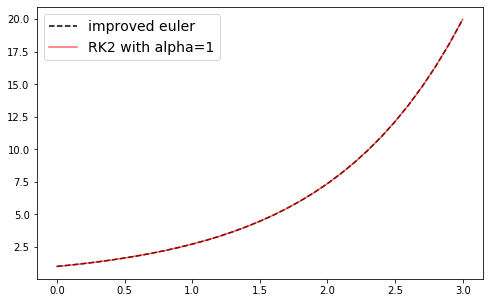

In [13]:
#Parameters
dt = 0.1
y0 = 1.0
t0 = 0.0
t_end = 3

#Find solutions for both methods
improved_euler_solution, t_all_euler = improved_euler(f_1_2, y0, t0, t_end, dt)
RK2_alpha_solution, t_all_RK2 = RK2_alpha(f_1_2, y0, t0, t_end, dt, 1)

#Plot both solutions
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
ax1.plot(t_all_euler, improved_euler_solution, 'k--', label='improved euler')
ax1.plot(t_all_RK2, RK2_alpha_solution, 'r-', alpha=0.6, label='RK2 with alpha=1')
ax1.legend(loc='best', fontsize=14)

#Calcaute the differnce between both solutions
difference = np.linalg.norm(improved_euler_solution - RK2_alpha_solution)/len(RK2_alpha_solution)

print(f"The RMS norm of the improved_euler implementation and the RK2 with alpha=1 is {difference}.") 

As seen above, the solution for the improved Euler and RK2 with alpha=1 are the same, there is a small a difference of less than $10^{-15}$ which is due to round off errors. From this and the theoretical approach above, it can be concluded that both methods are the same.

# Q1.3  Convergence rate for different $\alpha$ values

The test problem is:
$$ y' = y + t^3, \;\;\;\;\;\; y(0) = 1, $$  

with the exact solution

$$ y(t) = 7\text{e}^t - t^3 - 3t^2 - 6t - 6. $$


The $\alpha$ values are varied from 0.1 to 6.0 and for every $\alpha$ values the time steps are varied from 0.01 second to $10^{-3}$ second. Two error metrics are being considered, first the absolute difference at the last timestep and an appropriate norm which compares the solution over the entire time domain. The $L^2$ is used to compute the integral over the squared differences between two functions [1]. This integral can ab approximated using the RMS norm which is a normalized version of the two-norm. The RMS norm is best suited to compare the difference of two vectors and therefore it was chosen for all error calculations in this notebook.  

In [132]:
def RMS(a,b):
    """ Function that returns the RMS norm of two lists a and b
    """
    return(sl.norm(a - b)/ np.sqrt(len(a)))

In [158]:
def f_1_3(t, y):
    """ RHS of the test problem
    y' = y + t^3
    """ 
    return y + t**3

def y_ex(t):
    """ Exact solution to the ODE problem
    """ 
    return 7*np.exp(t) - t**3 - 3*t**2 - 6*t - 6

Text(0.5, 1.0, 'Absolute error $\\Delta t$ convergence plot for mutiple alpha values')

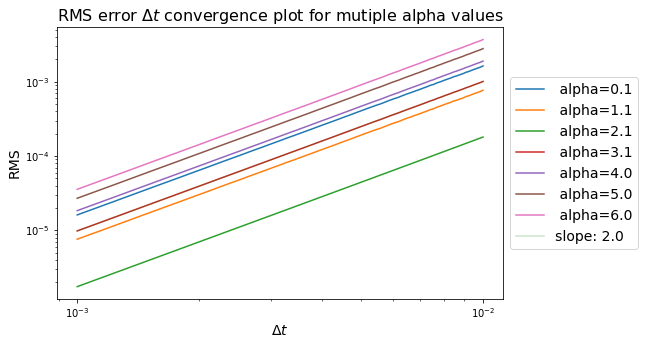

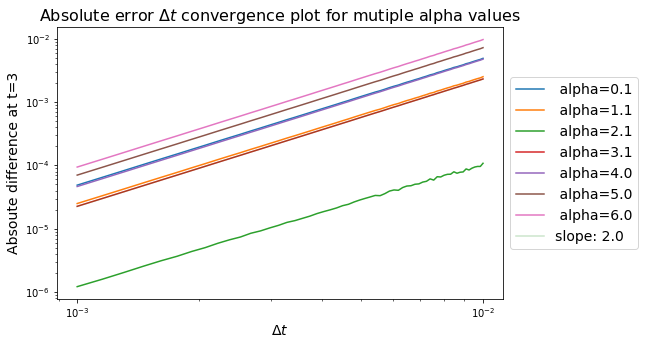

In [93]:
#Parameters
dt_list = np.linspace(0.01, 1.e-3, 60)
alpha_list = np.linspace(0.1, 7, 8)
y0 = 1.0
t0 = 0.0
t_end = 3

#set up to matrices to store errors for all alpha and dt values
convergence_t_end = np.zeros((len(dt_list), len(alpha_list)))
convergence_RMS = np.zeros((len(dt_list), len(alpha_list)))

for j, dt in enumerate(dt_list): #loop over dt values
    for i, alpha in enumerate(alpha_list): #loop over alpha values
        #use RK2 solver to find numerical solution
        y_RK2, t_RK2 = RK2_alpha(f_1_3, y0, t0, t_end, dt, alpha)
        #use RMS norm to find error
        error_RMS = RMS(y_RK2 - y_ex(t_RK2))
        #find error at last time step
        error_t_end = abs(y_ex(t_RK2[-1]) - y_RK2[-1])
        #put error values into matrices
        convergence_RMS[j,i] = error_RMS
        convergence_t_end[j,i] = error_t_end

#set up colors for plotting
jet= plt.get_cmap('tab10')
colors = iter(jet(np.linspace(0,1,10)))   

#find slope RMS of one alpha value
line_fit_RMS = np.polyfit(np.log(dt_list), np.log(np.array(convergence_RMS[:,3])), 1)
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5)) 
for n in range(len(alpha_list)-1): #plot all RMS errors for every alpha value
    ax1.loglog(dt_list, convergence_RMS[:,n], 'k-', color=next(colors), label= ' alpha={:.1f}'.format(alpha_list[n]))
ax1.loglog(dt_list, np.exp(line_fit_RMS[1]) * dt_list**(line_fit_RMS[0]), 'g-', alpha=0.2, label= 'slope: {:.1f}'.format(line_fit_RMS[0]))
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
ax1.set_xlabel('$\Delta t$', fontsize=14)
ax1.set_ylabel('RMS', fontsize=14)
ax1.set_title('RMS error $\Delta t$ convergence plot for mutiple alpha values', fontsize=16)

#set up colors for plotting
jet= plt.get_cmap('tab10')
colors = iter(jet(np.linspace(0,1,10)))

#find slope of absolute error one alpha value
line_fit_t_end = np.polyfit(np.log(dt_list), np.log(np.array(convergence_t_end[:,3])), 1)
fig2, ax2 = plt.subplots(1, 1, figsize=(8, 5))
for n in range(len(alpha_list)-1):#plot all absolute errors for every alpha value
    ax2.loglog(dt_list, convergence_t_end[:,n], 'r-', color=next(colors), label= ' alpha={:.1f}'.format(alpha_list[n]))
ax2.loglog(dt_list, np.exp(line_fit_t_end[1]) * dt_list**(line_fit_t_end[0]), 'g-', alpha=0.2, label= 'slope: {:.1f}'.format(line_fit_t_end[0]))
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
ax2.set_xlabel('$\Delta t$', fontsize=14)
ax2.set_ylabel('Absoute difference at t=3', fontsize=14)
ax2.set_title('Absolute error $\Delta t$ convergence plot for mutiple alpha values', fontsize=16)


The graphs above show similar things, the error decreases with smaller timestep with a slope of 2 for both error metrics. The RK2 method is 2 order accurate in time (Lecture 6 [1]) and therefore it is expected to have an order of convergence of 2 which is confirmed above. If a different norm, for example the two-norm, would have been used instead of the RMS norm the convergence rate would have been 1 because  the two-norm is not normalized by the length of the vector. 

The slope of the two graphs do not vary with different alpha value, this shows that the convergence does not depend on alpha, which is consistent with the theory, the RK2 method is always second order accurate regardless of the alpha value. However, both error metrics clearly show that there is an optimal alpha value, for this problem it is alpha = 2. This optimal alpha might vary slightly with different timesteps, but in this test it was shown that it is stable due to low number of alpha values tested. Alpha values which are either lower or higher than the optimal value show higher error values in both error metrics

The two graphs also show that the RMS error metric seems to give more accurate result than the absolute error at t=3. This is because the RMS norm considers the whole timeframe of the solution where the first few timesteps are more accurate than the later one since the error accumulates. This leads to seemingly more accurate solution but it is because to the whole time domain being considered. 

# Q1.4 Convergence graph comparison

From the graph above one can see that the best alpha value is 2.0, therefore in the following code compares the forward Euler, Improved Euler and RK2 method with alpha=2.0 .

In [15]:
def forward_euler(f, y0, t0, t_max, dt):
    """ Forward Euler time-stepper.
    f = f(t,y) is the RHS function.
    y0 is the initial condition.
    t0 is the initial time; t_max is the end time.
    dt is the time step size.
    """ 
    # Initialize list for y and t with initial condition
    y_all = [y0]
    t_all = [t0]
    while t_all[-1] < t_max: #continue calculation until last t_end  is reached 
        y = y_all[-1] + dt*f(t_all[-1], y_all[-1])  # euler guess
        y_all.append(y)
        t = t_all[-1] + dt #advance time 
        t_all.append(t)
    return np.array(y_all), np.array(t_all)


Text(0.5, 1.0, '$\\Delta t$ convergence plot for Forward Euler, Improved Euler and RK2')

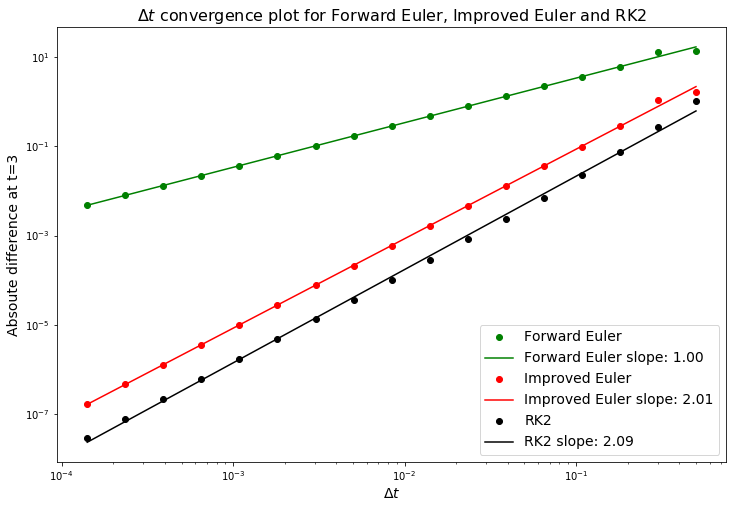

In [95]:
#Parameters
dt = 0.5
y0 = 1.0
t0 = 0.0
t_end = 3

# set up lists to store error and dt values
error_forward = []
error_improved = []
error_RK2 = []
dt_list = []

#compute error values until dt gets smaller than a certain value
while dt > 1.e-4:
    #use the three methods to compute solution
    y_forward, t_1 = forward_euler(f_1_3, y0, t0, t_end, dt)
    y_improved, t_2= RK2_alpha(f_1_3, y0, t0, t_end, dt, alpha=1)
    y_RK2, t_3= RK2_alpha(f_1_3, y0, t0, t_end, dt, alpha=2.0)
    #error_forward.append(abs(y_forward[-1] - y_ex(t_1[-1])))
    #error_improved.append(abs(y_improved[-1] - y_ex(t_2[-1])))
    #error_RK2.append(abs(y_RK2[-1] - y_ex(t_3[-1])))
    # Find analytical solution
    y_analytical = y_ex(t_3)
    #use RMS norm to find error and append to lists
    error_forward.append(RMS(y_forward, y_analytical))
    error_improved.append(RMS(y_improved, y_analytical))
    error_RK2.append(RMS(y_RK2 , y_analytical))
    dt_list.append(dt)
    #make dt smaller
    dt *= 0.6


#calculating linear fit  
line_fit_forward = np.polyfit(np.log(dt_list), np.log(np.array(error_forward)), 1)
line_fit_improved = np.polyfit(np.log(dt_list), np.log(np.array(error_improved)), 1)
line_fit_rk2 = np.polyfit(np.log(dt_list), np.log(np.array(error_RK2)), 1)

#plot solution
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))
ax1.loglog(dt_list, error_forward, 'go', label= 'Forward Euler')
ax1.loglog(dt_list, np.exp(line_fit_forward[1]) * dt_list**(line_fit_forward[0]), 'g-', label= 'Forward Euler slope: {:.2f}'.format(line_fit_forward[0]))
ax1.loglog(dt_list, error_improved, 'ro', label= 'Improved Euler')
ax1.loglog(dt_list, np.exp(line_fit_improved[1]) * dt_list**(line_fit_improved[0]), 'r-', label= 'Improved Euler slope: {:.2f}'.format(line_fit_improved[0]))
ax1.loglog(dt_list, error_RK2, 'ko', label= "RK2")
ax1.loglog(dt_list, np.exp(line_fit_rk2[1]) * dt_list**(line_fit_rk2[0]), 'k-', label= 'RK2 slope: {:.2f}'.format(line_fit_rk2[0]))
ax1.legend(loc='best', fontsize=14)
ax1.set_xlabel('$\Delta t$', fontsize=14)
ax1.set_ylabel('Absoute difference at t=3', fontsize=14)
ax1.set_title('$\Delta t$ convergence plot for Forward Euler, Improved Euler and RK2', fontsize=16)


As expected, the Forward Euler method is first order accurate (lecture 5 [1]). The Improved Euler and RK2 method are both second order accurate which was expected from the Taylor Series analysis which also suggested a second order convergence (lecture 6 [1]). Therefore, the theory and experimental order of convergence is the same for these three methods. The methods above do not have exactly the same order of convergence as predicted by the theory, this might be due to roundoff error and limited machine precision. 

The RK2 method has a significantly smaller absolute error than the Improved Euler method which is because of the optimal choice of the alpha value. If a different alpha value was chosen, which was not ideal for this problem, than the Improved Euler method might be more accurate.

# Q 1.5 optimal alpha value for fixed timestep

The alpha value for which the lowest RMS error occurs is: 1.951
The alpha value for which the lowest absolute error at t=3 occurs is: 2.083


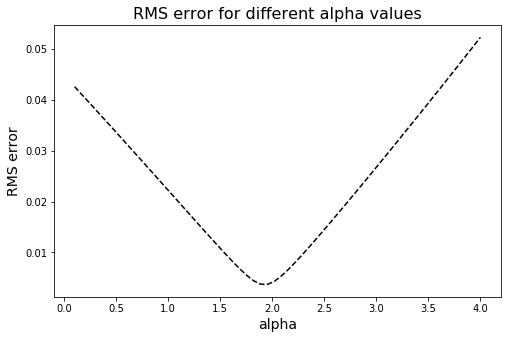

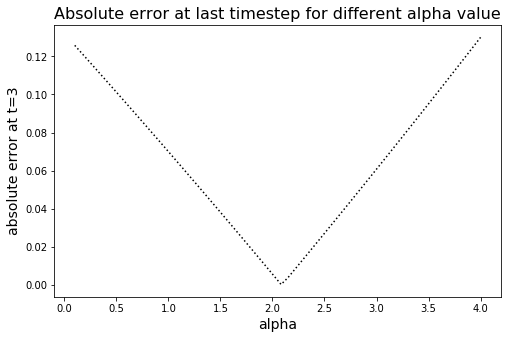

In [127]:
#Parameters
dt = 0.05
alpha_list = np.linspace(0.1, 4, 60)
y0 = 1.0
t0 = 0.0
t_end = 3

# create lists to store error
error_list_RMS = []
error_list_t_end = []

for i, alpha in enumerate(alpha_list): #loop over all alpha values
    #find RK2 solution
    y_RK2, t_RK2 = RK2_alpha(f_1_3, y0, t0, t_end, dt, alpha)
    #RMS error
    error_RMS = RMS(y_RK2, y_ex(t_RK2))
    #absolute error
    error_t_end = (abs(y_ex(t_RK2[-1]) - y_RK2[-1]))
    #append errors to lists
    error_list_RMS.append(error_RMS)
    error_list_t_end.append(error_t_end)

# plot RMS error
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
ax1.plot(alpha_list, error_list_RMS, 'k--')
ax1.set_xlabel('alpha', fontsize=14)
ax1.set_ylabel('RMS error', fontsize=14)
ax1.set_title('RMS error for different alpha values', fontsize=16)

#plot absolute error
fig2, ax2 = plt.subplots(1, 1, figsize=(8, 5))
ax2.plot(alpha_list, error_list_t_end, 'k:')
ax2.set_xlabel('alpha', fontsize=14)
ax2.set_ylabel('absolute error at t=3', fontsize=14)
ax2.set_title('Absolute error at last timestep for different alpha value', fontsize=16)

min_alpha_RMS = alpha_list[error_list_RMS.index(min(error_list_RMS))] #find optimal alpha value for RMS
min_alpha_t_end = alpha_list[error_list_t_end.index(min(error_list_t_end))] #find optimal alpha value for absolute error
print(f"The alpha value for which the lowest RMS error occurs is: {min_alpha_RMS:.3f}")
print(f"The alpha value for which the lowest absolute error at t=3 occurs is: {min_alpha_t_end:.3f}")

As expected above, the optimal alpha value is somewhere close to two, but the optimal alpha value varies with the error metric used. The RMS error predicts an optimal alpha value of 1.95 while the absolute error at t=3 predicts are optimal alpha value of 2.08. This is because the RMS error metric considers the entire time domain and not just the last timestep. This means that the optimal alpha value does depend on the application, if only the last timestep is needed or if the entire time series is required.  

# Q 1.6 optimal alpha value for different timesteps

Text(0.5, 1.0, 'Optimal alpha value for every timestep')

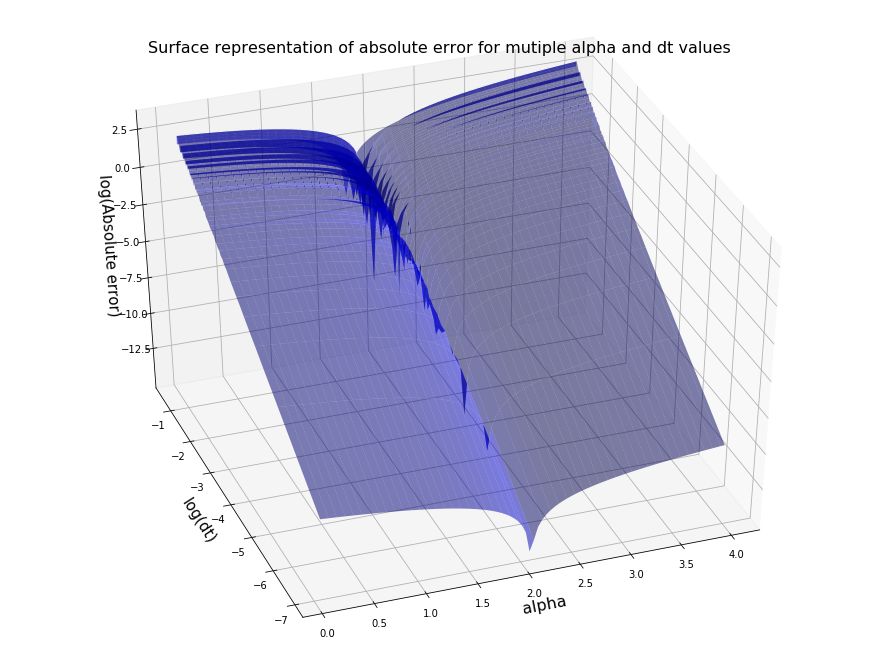

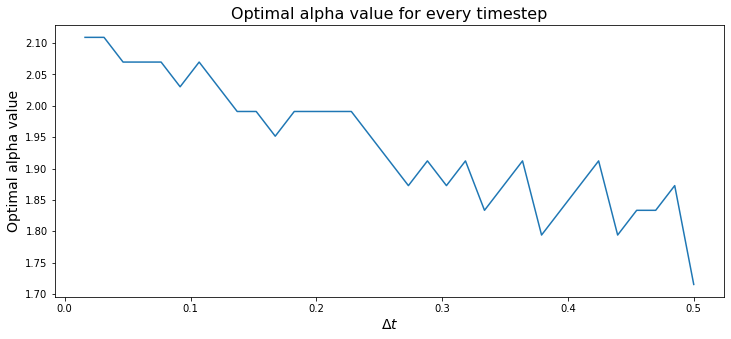

In [28]:
#Parameters
dt_list = np.linspace(0.5, 1.e-3, 100)
alpha_list = np.linspace(0.1, 4, 100)
y0 = 1.0
t0 = 0.0
t_end = 3

# create array to store error for every dt and alpha value
error_array = np.zeros((len(dt_list), len(alpha_list)))

for i, dt in enumerate(dt_list): #loop over all dt
    for j, alpha in enumerate(alpha_list): #for every dt loop over all alpha values
        y_RK2, t_RK2 = RK2_alpha(f_1_3, y0, t0, t_end, dt, alpha)
        error_ij= abs(y_ex(t_RK2[-1]) - y_RK2[-1])
        error_array[i, j] = error_ij

#Plot 3d surface of error_array
fig3d = plt.figure(figsize=(12,9))
ax3d = Axes3D(fig3d)
X, Y = np.meshgrid(alpha_list, dt_list)
ax3d.plot_surface(X, np.log(Y), np.log(error_array), color='b', alpha=0.5, linewidth=0)
ax3d.view_init(elev=40., azim=250) #set view angle and elevation
ax3d.set_xlabel('alpha', fontsize=16)
ax3d.set_ylabel('log(dt)', fontsize=15)
ax3d.set_zlabel('log(Absolute error)', fontsize=15)
ax3d.set_title('Surface representation of absolute error for mutiple alpha and dt values', fontsize=16)

#from the error_array find optimal alpha value for each dt
index_min_alpha = np.argmin(error_array, axis=1) #find index of min alpha value for every row in array
min_alpha_list = [] #create list to store min alpha values for plotting
for i in index_min_alpha: #loop over all the indexes of the minimum alpha values
    min_alpha_list.append(alpha_list[i]) #find alpha value corresponding to index and store in array

#Plot solution
fig, ax1 = plt.subplots(1, 1, figsize=(12, 5))
ax1.plot(dt_list[0:-1:3], min_alpha_list[0:-1:3])
ax1.set_xlabel('$\Delta t$', fontsize=14)
ax1.set_ylabel('Optimal alpha value', fontsize=14)
ax1.set_title('Optimal alpha value for every timestep', fontsize=16)


In the code above the absolute difference at the last timestep was calculated for different timesteps and alpha values. The first plot shows a surface representation of how to error changes with dt and alpha. As noted in Q 1.3, there is an alpha value which minimises the error for every time step. The error decrease with smaller timesteps as expected but the alpha value has a significant affect on the accuracy of the solution. 

The second plot shows how the optimal alpha value varies with timestep length. For small timesteps (<0.1) the optimal alpha value is above 2 but as the timestep increases the optimal alpha value decreases. As the dt increases, the point where second slope is calculated (i.e. $k_2$) is evaluated at a later time ($t_n + \alpha \Delta t$) and larger y value ($y_n + \alpha\,\Delta t\   f(t_n, y_n)$) which will make it less accurate. There seems to be a optimal distance between the points where the slopes are being evaluated (i.e. ($k_1$) and ($k_2$)), this distance varies with dt but the alpha value can be used to keep the distance to an optimal level.  Smaller alpha values will also mean that  $k_2$ becomes less important for the solution $y_{n+1}$ while the contributions slope of the solution at $y_n$ ($k_1$) is more important.  This means the alpha value controls the distance of the between the points ($k_1$) and ($k_2$) as well as their contributions to the solution. As the timestep increases,  $k_2$ will become less accurate and therefore the alpha value is used to counteract this. 


#  Solving the unsteady advection-diffusion equation using the finite difference method


# 2.1.1 Theta method

The FTCS, BTCS, and Crank-Nicolson schemes can be implemeted with the theat method where $\theta$=0 corresponds to FTCS, $\theta$=1 to BTCS and $\theta$=0.5 to Crank-Nicolson (CN).

\begin{align}
\frac{\boldsymbol{c}^{n+1} - \boldsymbol{c}^{n}}{\Delta t} &= A\left(\theta\boldsymbol{c}^{n+1} + (1-\theta)\boldsymbol{c}^{n}\right)\;\; 
\end{align}

The BTCS and Crank-Nicolson scheme are implicit, therefore the theta methods needs to be rearrange such that ${c}^{n+1}$ only depends on ${c}^{n}$. Instead of rearrange the equation, a non-linear solver could be used, this is however, not needed due to the linear PDE that is solved and a non-linear solver would require more work to be done for every timestep.\
The following describes how to Theta method needs to be rearranged to be solved using a linear solver.

\begin{align}
{\boldsymbol{c}^{n+1} - \boldsymbol{c}^{n}}- A\theta\boldsymbol{c}^{n+1}{\Delta t} &=  (1-\theta)\boldsymbol{c}^{n}{\Delta t}A\;\; 
\end{align}

\begin{align}
{\boldsymbol{c}^{n+1}}(I - A\theta{\Delta t}) &= (I + (1-\theta){\Delta t}A)\boldsymbol{c}^{n}\;\; 
\text{where I is the identity matrix}
\end{align}

The linear system above can be solved by calling using three methods (Inverse, direct or iterative solver). 

1. Using the inverse of the LHS matrix. By calculate the inverse of the matrix system on LHS once and then use matrix multiplication to calculate the new timestep. With this method, every timestep will only require a matrix multiplication rather than a linear solve which can speed up the algorithm. 
\begin{align}
A_{inverse} &= (I - A\theta{\Delta t})^{-1}\\
{\boldsymbol{c}^{n+1}} &= (A_{inverse} + {\Delta t}(1-\theta)AA_{inverse})\boldsymbol{c}^{n}\;\;
\end{align}
However, it was found that this is fast for small systems (N < 100) but for large system it takes significantly longer, therefore this method was not choosen.


2. Iterative solver were tested but they mostly require a positive defined matrix. However, the LHS matrix is not positive defined and therefore theses solvers didn’t work or were slower as a direct solver (sl.solve with check_finite=False). A solver that is specialised on banded matrices such as scipy.linalg.solve_banded might have been even fast for this method but it was unable to handle the wrapped values in discretisation matrix that are needed for the periodic behaviour of the solution.

The Forward and Backwards Euler methods are both first order methods in time (Lecture 6 [1]) but the convergence of the Crank-Nicolson scheme is derived below. The general form for a Linear multistep method (lecture 6 [1]) is: 

$$\sum_{j=0}^k \alpha_j \, y_{n+j} = \Delta t \sum_{j=0}^k \beta_j \, f(t_{n+j},y_{n+j}),$$

where for the Crank-Nicolson (k=1) $\alpha_0 = -1$, $\alpha_1=1$, $\beta_0 = 0.5$, $\beta_1 = 0.5 $ and all other $\alpha$ and $\beta$ are zero. The local truncation  error for all Linear multistep methods is [1]: 

$$\tau := \frac{1}{\Delta t}\left[ \sum_{j=0}^k \alpha_j \, y(t_{n+j}) - \Delta t \sum_{j=0}^k \beta_j \, y'(t_{n+j})\right],$$

the derivatives in the expression above can be approximated using a Taylor expansion: 
$$ y(t_{n+j}) = y(t_n) + j\Delta t\, y'(t_n) + \frac{j^2\Delta t^2}{2!}y''_n + \mathcal{O}(\Delta t^3),$$
$$ y'(t_{n+j}) = y'(t_n) + j\Delta t\, y''(t_n) + \frac{j^2\Delta t^2}{2!}y'''_n + \mathcal{O}(\Delta t^3).$$

and substituting these in the local truncation error and rearranging will yield [1]:

\begin{align*}
\tau = \frac{1}{\Delta t}\left( \sum_{j=0}^k \alpha_j \right)y(t_n)
+ \left( \sum_{j=0}^k (j\alpha_j - \beta_j)\right)y'(t_n)
& + \Delta t\left( \sum_{j=0}^k \left(\frac{1}{2}j^2\alpha_j - j\beta_j\right)\right)y''(t_n) + \ldots
\end{align*}

The first three terms of the expression above are zero:

$$\sum_{j=0}^k \alpha_j = -1 + 1 = 0 $$

$$\sum_{j=0}^k (j\alpha_j - \beta_j) = (0 - 0.5) + (1 -0.5) = 0$$

$$\sum_{j=0}^k (\frac{1}{2}j^2\alpha_j - j\beta_j) = (0 - 0) + (0.5-0.5)=0$$

which means that the truncation error is: 

\begin{align*}
\tau = \Delta t^2\left( \sum_{j=0}^k \left(\frac{1}{6}j^3\alpha_j - \frac{1}{2}j^2\beta_j\right)\right)y'''(t_n)+\ldots
\end{align*}

The first term of this expression will be the leading error term and it is dependent on the $\Delta t^2$ which shows that the Crank-Nicolson method is second order accurate in time.

## 2.1.2 Time step size

Before running the theta method, the stability region for the time stepping needs to be investigated. The physical parameters of the problem are set and now a combination of dx and dt needs to be found which will give a stable solution for the time stepping methods. 

In [20]:
def adv_diff_analytical_solution(U, kappa, x0, x, t):
    """ Analtical solution to advection-diffusion for an assumed 
    Dirac-delta initial condition at t=0.
    """
    return np.exp( -((x-x0) - U*t)**2 / (4.*kappa*t)) / np.sqrt(4. * np.pi * kappa * t)


def adv_central_periodic(N):
    """ Funtion to generate the NxN discretisation matrix for advection
    using second-order central differences.
    
    NB. this version does not multiply through by the factor  (U / dx).
    """
    Dx = 0.5*np.eye(N, k=1) - 0.5*np.eye(N, k=-1)
    # Add in the wrapped values due to periodicity
    Dx[0, -1] = -0.5
    Dx[-1, 0] = 0.5
    return Dx

def diff_central_periodic(N):
    """ Funtion to generate the NxN discretisation matrix for diffusion
    using second-order central differences.
    
    NB. this version does not multiply through by the factor  (kappa / dx**2).
    """
    Dxx = np.eye(N, k=1) - 2*np.eye(N) + np.eye(N, k=-1)
    # Add in the wrapped values due to periodicity
    Dxx[0, -1] = 1.
    Dxx[-1, 0] = 1.
    return Dxx

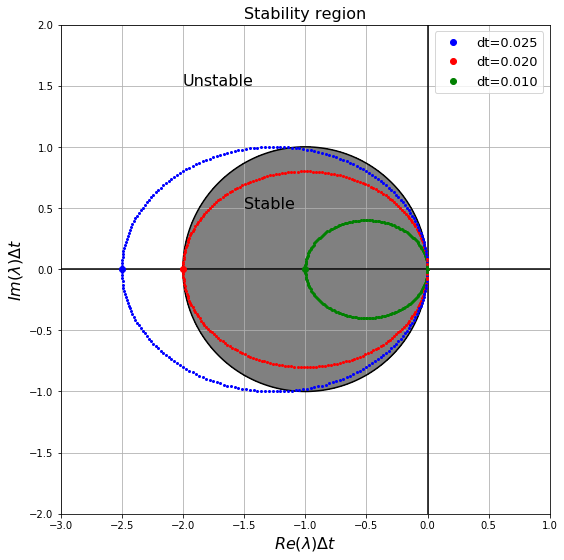

In [136]:
#code below is taken from [1]

#Parameters
U = 0.8
N = 250
L = 5
kappa = 1./100.
dx = L / N
dt= [0.025, 0.02, 0.01,]


Dx = adv_central_periodic(N)
Dxx = diff_central_periodic(N)
A = -(U / dx) * Dx + (kappa / dx**2) * Dxx

# compute the eigenvales
A_eigen = np.linalg.eigvals(A)

#set up plot
fig = plt.figure(figsize=(9, 9))
ax1 = plt.subplot(111)
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_xlabel(r'$Re(\lambda)\Delta t$', fontsize=16)
ax1.set_ylabel(r'$Im(\lambda)\Delta t$', fontsize=16)
ax1.set_title('Stability region', fontsize=16)
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.set_xlim(-3, 1)
ax1.set_ylim(-2, 2)
# plot eigenvalues
for eig in A_eigen:
    ax1.plot(np.real(eig)*dt[0], np.imag(eig)*dt[0], 'bo', markersize=2)
    ax1.plot(np.real(eig)*dt[1], np.imag(eig)*dt[1], 'ro', markersize=2)
    ax1.plot(np.real(eig)*dt[2], np.imag(eig)*dt[2], 'go',markersize=2)
ax1.plot(np.real(A_eigen[0])*dt[0], np.imag(A_eigen[0])*dt[0], 'bo', label='dt={0:.3f}'.format(dt[0]))
ax1.plot(np.real(A_eigen[0])*dt[1], np.imag(A_eigen[0])*dt[1], 'ro', label='dt={0:.3f}'.format(dt[1]))
ax1.plot(np.real(A_eigen[0])*dt[2], np.imag(A_eigen[0])*dt[2], 'go', label='dt={0:.3f}'.format(dt[2]))
ax1.legend(loc='best', fontsize=13)
    
    
# create mesh grid for the euler stability region    
x = np.linspace(-2.5, 0.5, 250)
y = np.linspace(-1.5, 1.5, 100)
xx, yy = np.meshgrid(x, y)
lamdt = xx + 1j*yy

# forward Euler amplification factor,  and its magnitude
FEamp = 1 + lamdt
FEampmag = np.abs(FEamp)

# plot the forward Euler stability region
ax1.contour(x, y, FEampmag, [1.0], colors=('k'))
ax1.contourf(x, y, FEampmag, (0.0, 1.0), colors=('grey'))

ax1.text(-1.5, 0.5, 'Stable', fontsize=16)
ax1.text(-2, 1.5, 'Unstable', fontsize=16);

The figure above shows the stability region for the forward Euler method. The backwards Euler is unconditionally  stable for negative real eigenvalues and  Crank-Nicolson has a larger stability regions, therefore, if dt and dx is chosen so that it is stable for the forward Euler method, the other two methods will also be stable. <br>
For forward Euler to be stable, the magnitude amplification factor, which consist of the eigenvalue of the discretisation matrix and dt, needs to be below 1. As seen above, the magnitude of the amplification factor for all the eigenvalues is in the stability region for all dt below 0.02 seconds and a N of 250. Above this threshold, the Forward Euler method can be unstable. Therefore, for the following analysis below, a timestep of 0.01 seconds and a N of 250 is chosen to ensure all three methods are stable. 


In [137]:
dt = 0.01

print('CFL:  {0:.5f}'.format(U*dt/dx))
print('Pe_c: {0:.5f}'.format(U*dx/kappa))
print('r:    {0:.5f}'.format(kappa*dt/(dx**2)))

CFL:  0.40000
Pe_c: 1.60000
r:    0.25000


The code above prints out all the stability condisitons and all three condistions for Forward Euler are satisfied using the Parameters set above. This means that the three methods should run stable. 

## 2.1.3 Verification

In [21]:
def theat_method(N, dt, t_start, t_end, U, kappa, theta):
    """ Solve the advection-diffusion problem using a central differnce in space
    on a periodic domain with a hard coded Gaussian-shaped initial condition.
    For theta = 0: FTCS
    For theta = 1: BCCS
    For theta = 0.5: Crank-Nicolson
    
    Returns:
    C - the solution at all time levels.
    x - the spatial mesh.
    t - the time levels.
    """
    # define spatial mesh using L and N
    dx = L / N
    x = np.linspace(0, L, N)
       
    # create discretisation matrix
    Dx = adv_central_periodic(N)
    Dxx = diff_central_periodic(N)
    A = -(U / dx) * Dx + (kappa / dx**2) * Dxx

    # define temporal mesh which contains times to evalute the solution
    t = np.arange(t_start, t_end, dt)

    #set up marix to store solution for each timestep
    C = np.empty((len(x), len(t)))
    
    # define an initial condition
    C[:,0] = adv_diff_analytical_solution(U, kappa, x0, x, t_start)
    #create identiy matrix and loop over time
    I = np.eye(len(x))
    #inverse_A = np.linalg.inv(I - A * dt*theta)
    #inverse_A = np.linalg.inv(I - A * dt*0.5) hard code crank-nicolon
    # loop over time
    for n in range(len(t)-1):
        C[:,n+1] = sl.solve(I - A * dt*theta, (I + (1 - theta)*dt*A) @ C[:,n], check_finite=False) #linar solver
        #C[:,n+1] = (inverse_A + (1 - theta)*dt*A @ inverse_A) @ C[:,n]
        #C[:,n+1] = inverse_A @ C[:,n] + 0.5*dt * A @ inverse_A @ C[:,n] hard code crank-nicolon
    return C, x, t

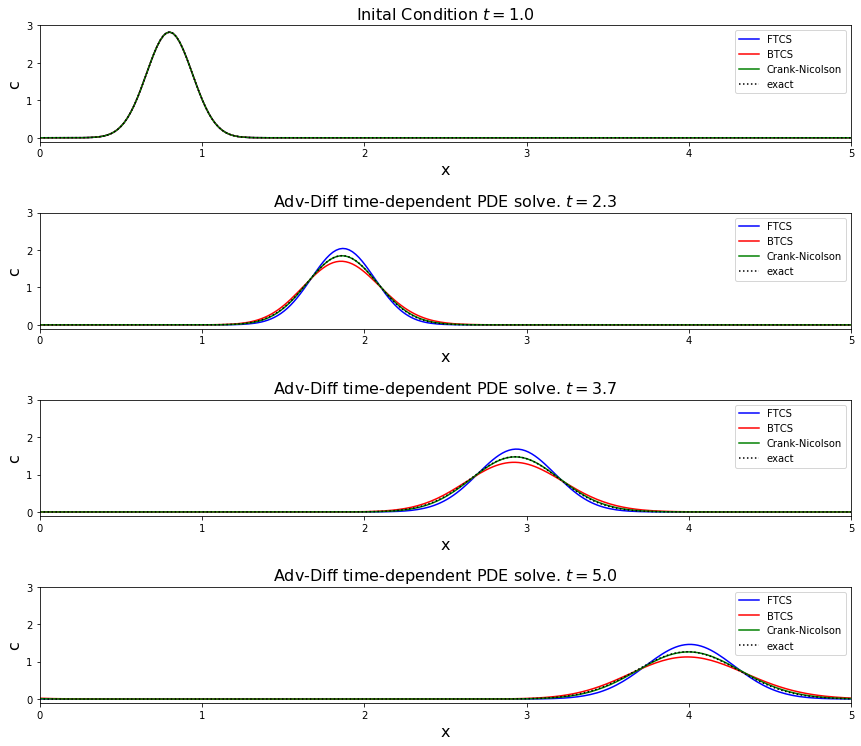

In [68]:
U = 0.8
kappa = 1./100.
N = 250
L = 5.
dx = L / N
dt = 0.01
t_start = 1.
t_end = t_start + 4.
x0 = 0


# set up figure
fig, axs = plt.subplots(4, 1, figsize=(12, 10))
axs = axs.reshape(-1)
fig.tight_layout(w_pad=4, h_pad=5)

C_FTCS, x_FTCS, t_FTCS = theat_method(N, dt, t_start, t_end, U, kappa, 0)
C_BTCS, x_BTCS, t_BTCS = theat_method(N, dt, t_start, t_end, U, kappa, 1)
C_CN, x_CN, t_CN = theat_method(N, dt, t_start, t_end, U, kappa, 0.5)

xf = np.linspace(0, L, 1000)
for i, n in enumerate(np.linspace(0, C_FTCS.shape[1]-1, 4, dtype=int)):
    axs[i].plot(x_FTCS, C_FTCS[:,n], 'b-', label='FTCS')
    axs[i].plot(x_BTCS, C_BTCS[:,n], 'r-', label='BTCS')
    axs[i].plot(x_CN, C_CN[:,n], 'g-', label='Crank-Nicolson')
    axs[i].plot(xf, adv_diff_analytical_solution(U, kappa, x0, xf, t_FTCS[n]), 'k:', label='exact')
    axs[i].legend(loc='best')
    axs[i].set_xlim(0.0, 5)
    axs[i].set_ylim(-0.1, 3)
    axs[i].set_title('Adv-Diff time-dependent PDE solve. $t=${0:.1f}'.format(t_FTCS[n]), fontsize=16)
    axs[i].set_xlabel('x', fontsize=16)
    axs[i].set_ylabel('c', fontsize=16)
    if i == 0:
        axs[i].set_title('Inital Condition $t=${0:.1f}'.format(t_FTCS[n]), fontsize=16)

From the plots above, it seems like BTCS is too diffusive while FTCS is not diffusive enough.Therefore, combining both methods into the Crank-Nicolson scheme should give a better approximation. Comparing the Crank-Nicolson solution to the exact solution shows that it seems to able to capture the correct amount of diffusion without any phase lag.

# 2.2 dt convergence

For the dt convergence analyse at sufficiently small dx needs to be chosen such that the time stepping error is the leading error term. The largest timestep used in the following code is 0.01 second, for this time step, the smallest dx that guarantees a stable solution depends on the number of mesh points N. It was found that an N of 350 will give a maximum amplification factor of about 1 and is, therefore, the smallest dx possible for a stable solution.  N is therefore set to 350 in the analysis below to grantee that the space error is as small es possible without leading to possible instabilities for the Forward Euler method. The same N will also be used for the Backward Euler method but since the Crank-Nicolson is second order accurate, it will convergence much faster than the other two methods and therefore it requires a smaller dx to ensure that the spatial error is significantly smaller than the time-stepping error. Therefore, a new mesh node number, Ncn is used for the C-N method and it equal to 2N. 

To ensure that the computations during the convergence plots are stable, the stability conditions for the first and last run are printed out below. This shows, that the Forward Euler method will be stable throughout the convergence analysis which means the other two methods are stable as well. 

In [76]:
U = 0.8
L = 5
kappa = 1./100.
N = 350
dx = L/N
#At start of convergence
dt = 0.01
print('First iteration stability conditions:')
print('CFL:  {0:.2f}'.format(U*dt/dx))
print('Pe_c: {0:.2f}'.format(U*dx/kappa))
print('r:    {0:.2f}'.format(kappa*dt/(dx**2)))

#At end of convergence
dt = 0.0009
print('Last iteration stability conditions:')
print('CFL:  {0:.2f}'.format(U*dt/dx))
print('Pe_c: {0:.2f}'.format(U*dx/kappa))
print('r:    {0:.2f}'.format(kappa*dt/(dx**2)))


First iteration stability conditions:
CFL:  0.56
Pe_c: 1.14
r:    0.49
Last iteration stability conditions:
CFL:  0.05
Pe_c: 1.14
r:    0.04


Text(0.5, 1.0, '$\\Delta t$ convergence plot (constant dx)')

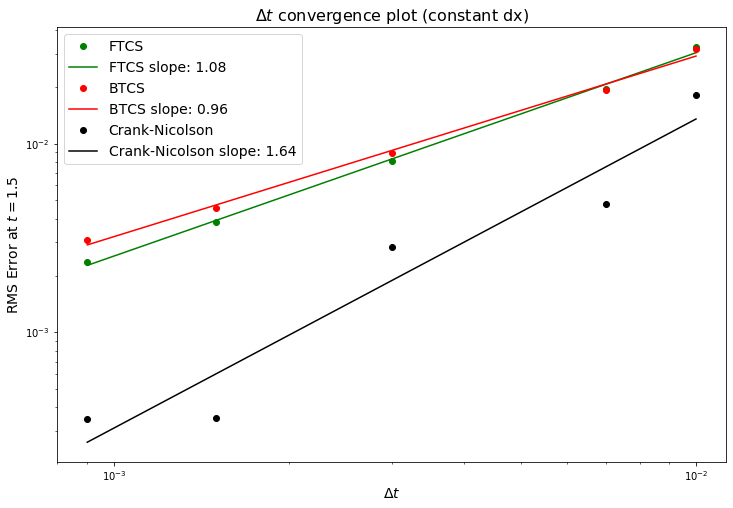

In [58]:
#set parameters
U = 0.8
kappa = 1./100.
N = 350
Ncn = N*2
L = 5
dx = L / N
t_start = 1.
t_end = t_start + 0.5
x0 = 1.
xf = np.linspace(0, L, N)
xfx = np.linspace(0, L, Ncn)
dt_list = [0.01, 0.007, 0.003, 0.0015, 0.0009]
#dt_list = [0.009, 0.007, 0.003, 0.0005]

#initialize lists for errors and dt
error_array_FTCS = []
error_array_BTCS = []
error_array_CN = []
dt_array = []


#loop over all dt values
for dt in dt_list:
    #solve the ODE with the three methods
    C_FTCS, x_FTCS, t_FTCS = theat_method(N, dt, t_start, t_end, U, kappa, 0)
    C_BTCS, x_BTCS, t_BTCS = theat_method(N, dt, t_start, t_end, U, kappa, 1)
    C_CN, x_CN, t_CN = theat_method(Ncn, dt, t_start, t_end, U, kappa, 0.5)
    #find true solution
    analytical_C = adv_diff_analytical_solution(U, kappa, x0, xf, t_end)
    analytical_Cx = adv_diff_analytical_solution(U, kappa, x0, xfx, t_end)
    #use linalg.norm to find error and append to list
    error_array_FTCS.append(np.linalg.norm(analytical_C - C_FTCS[:,-1])/np.sqrt(len(analytical_C)))
    error_array_BTCS.append(np.linalg.norm(analytical_C - C_BTCS[:,-1])/np.sqrt(len(analytical_C)))
    error_array_CN.append(np.linalg.norm(analytical_Cx - C_CN[:,-1])/np.sqrt(len(analytical_Cx)))
    dt_array.append(dt)



#calculating linear fit  
line_fit_FTCS = np.polyfit(np.log(dt_array), np.log(error_array_FTCS), 1)
line_fit_BTCS = np.polyfit(np.log(dt_array), np.log(error_array_BTCS), 1)
line_fit_CN = np.polyfit(np.log(dt_array), np.log(error_array_CN), 1)

#plot solution
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))
ax1.loglog(dt_array, error_array_FTCS, 'go', label= 'FTCS')
ax1.loglog(dt_array, np.exp(line_fit_FTCS[1]) * dt_array**(line_fit_FTCS[0]), 'g-', label= 'FTCS slope: {:.2f}'.format(line_fit_FTCS[0]))
ax1.loglog(dt_array, error_array_BTCS, 'ro', label= 'BTCS')
ax1.loglog(dt_array, np.exp(line_fit_BTCS[1]) * dt_array**(line_fit_BTCS[0]), 'r-', label= 'BTCS slope: {:.2f}'.format(line_fit_BTCS[0]))
ax1.loglog(dt_array, error_array_CN, 'ko', label= "Crank-Nicolson")
ax1.loglog(dt_array, np.exp(line_fit_CN[1]) * dt_array**(line_fit_CN[0]), 'k-', label= 'Crank-Nicolson slope: {:.2f}'.format(line_fit_CN[0]))
ax1.legend(loc='best', fontsize=14)
ax1.set_xlabel('$\Delta t$', fontsize=14)
ax1.set_ylabel('RMS Error at $t=1.5$', fontsize=14)
ax1.set_title('$\Delta t$ convergence plot (constant dx)', fontsize=16)

The Forward and Backwards Euler methods are both first order methods (Lecture 6 [1]) which is also proven in the graph above, the both convergence if a slope of about 1.

The Crank-Nicolson method is second order accurate in time but in the above plot it only convergence at a rate of 1.64. This could have multiple reasons:
1. The implementation of the theta method is not correctly or there are bugs in the code
2. The implementation of the convergence plot is incorrect (wrong Norm used or bug in code)
3. The values tested for the convergence plot are not ideal for the C-N method

The first reason might be the cause of the issue but since the other methods are converging at the correct rate, the spatial convergence is correct as well and a hard-coded C-N methods gave similar results, it seems unlikely. There might be a bug inside the loop that computes the convergence plot or the polyfit function but these unlikely as well. The most likely reason is that the values tested do not yield a second order convergence for the C-N method. Multiple other values were tested in a combination with a very smaller dx of 0.0001. This gave a convergence rate of 1.8 which is still not the same as the theoretical value but it does show that C-N can convergence faster for certain values. 


# 2.3 dx convergence

From the dt convergence above, a previous analysis has shown that the time-stepping error falls below $10^{-3}$ for a timestep of 3.e-4 seconds. Therefore, a dt of 3.e-4 s will be used to ensure that the time-stepping error is not the dominant error term. Additionally, the simulation is only run for 0.1 seconds to further reduce the effect of the time-stepping.

To ensure that the computations during the convergence plots are stable, the stability conditions for the first and last run are printed out below. To ensure the first few runs are stable U and $\kappa$ had to be changed such that it satisfies the Peclet number condition due to large dx values as the start. This shows that the Forward Euler method will be stable throughout the convergence analysis which means the other two methods are stable as well.

In [75]:
U = 0.2
L = 5
kappa = 1./100.
dt = 3.e-4
#At start of convergence
N = 51
dx = L/N
print('First iteration stability conditions: ')
print('CFL:  {0:.2f}'.format(U*dt/dx))
print('Pe_c: {0:.2f}'.format(U*dx/kappa))
print('r:    {0:.2f}'.format(kappa*dt/(dx**2)))

#At end of convergence
N = 350
dx = L/N
print('Last iteration stability conditions: ')
print('CFL:  {0:.2f}'.format(U*dt/dx))
print('Pe_c: {0:.2f}'.format(U*dx/kappa))
print('r:    {0:.2f}'.format(kappa*dt/(dx**2)))


First iteration stability conditions: 
CFL:  0.00
Pe_c: 1.96
r:    0.00
Last iteration stability conditions: 
CFL:  0.00
Pe_c: 0.29
r:    0.01


Text(0.5, 1.0, 'dx convergence plot (constant $\\Delta t$)')

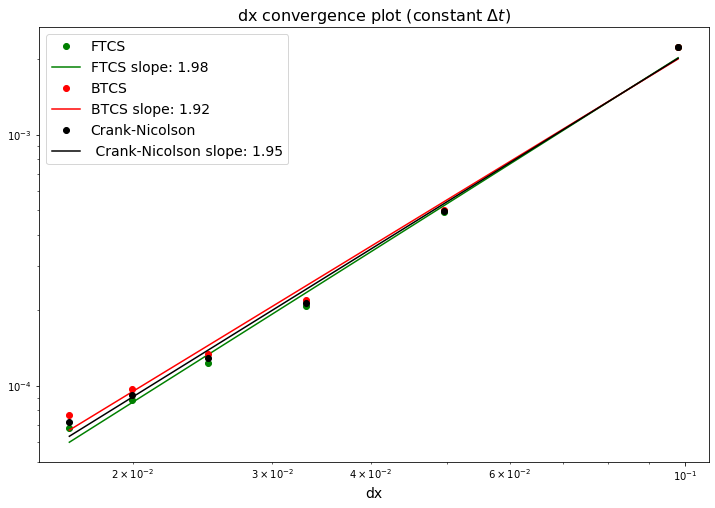

In [73]:
#set parameters
N = 51
U = 0.2
kappa = 1./100.
L = 5.
t_start = 2.
t_end = t_start + 0.1
x0 = 1.0
xf = np.linspace(0, L, N)
dt = 3.e-4


#initialize lists for errors and dt
error_array_FTCS = []
error_array_BTCS = []
error_array_CN = []
dx_array = []


#calculate with more elements every step
while N < 350:
    #solve the ODE with the three methods
    xf = np.linspace(0, L, N)
    dx = L / N
    C_FTCS, x_FTCS, t_FTCS = theat_method(N, dt, t_start, t_end, U, kappa, 0)
    C_BTCS, x_BTCS, t_BTCS = theat_method(N, dt, t_start, t_end, U, kappa, 1)
    C_CN, x_CN, t_CN = theat_method(N, dt, t_start, t_end, U, kappa, 0.5)
    #find true solution
    analytical_C = adv_diff_analytical_solution(U, kappa, x0, xf, t_end)
    #use linalg.norm to find error and append to list
    error_array_FTCS.append(np.linalg.norm(analytical_C - C_FTCS[:,-1])/np.sqrt(len(analytical_C)))
    error_array_BTCS.append(np.linalg.norm(analytical_C - C_BTCS[:,-1])/np.sqrt(len(analytical_C)))
    error_array_CN.append(np.linalg.norm(analytical_C - C_CN[:,-1])/np.sqrt(len(analytical_C)))
    dx_array.append(dx)
    #increase number of elements
    N += 50


#calculating linear fit  
line_fit_FTCS = np.polyfit(np.log(dx_array), np.log(error_array_FTCS), 1)
line_fit_BTCS = np.polyfit(np.log(dx_array), np.log(error_array_BTCS), 1)
line_fit_CN = np.polyfit(np.log(dx_array), np.log(error_array_CN), 1)

#plot solution and linear fit line
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))
ax1.loglog(dx_array, error_array_FTCS, 'go', label= 'FTCS')
ax1.loglog(dx_array, np.exp(line_fit_FTCS[1]) * dx_array**(line_fit_FTCS[0]), 'g-', label= 'FTCS slope: {:.2f}'.format(line_fit_FTCS[0]))
ax1.loglog(dx_array, error_array_BTCS, 'ro', label= 'BTCS')
ax1.loglog(dx_array, np.exp(line_fit_BTCS[1]) * dx_array**(line_fit_BTCS[0]), 'r-', label= 'BTCS slope: {:.2f}'.format(line_fit_BTCS[0]))
ax1.loglog(dx_array, error_array_CN, 'ko', label= "Crank-Nicolson")
ax1.loglog(dx_array, np.exp(line_fit_CN[1]) * dx_array**(line_fit_CN[0]), 'k-', label= ' Crank-Nicolson slope: {:.2f}'.format(line_fit_CN[0]))
ax1.legend(loc='best', fontsize=14)
ax1.set_xlabel('dx', fontsize=14)
ax1.set_title('dx convergence plot (constant $\Delta t$)', fontsize=16)

The graph above shows a convergence just below 2 for all three methods, it could be higher but the last value that was included in the calculation skewed the line a little upwards which decreased the slope. This means that the fixed timestep size chosen for the analysis was not small enough and a small time stepping error was included in the last calculation since the error is smaller than $10^{-3}$. The time stepping error was not large enough to make a significant change to the previous calculations with larger dx values. The issue with the dx convergence is that it is second order accurate while the dt convergence is only 1 order for the two methods. This means the dx convergence will have a relatively small error and therefore needs a significantly smaller timestep to ensure that the spatial error dominates.

All three methods use a central difference scheme to discretize the special domain which leads to a second order convergence in space (Lecture 7 [1]). This is confirmed by the plot above, all three methods show a slope of close to 2 which means they are second order accurate in space. 

# Solving the unsteady advection-diffusion equation using the finite element method

## Q3.1 FEM solver

The unsteady advection-diffusion equation in its strong form can be written as:

$$\frac{\partial u}{\partial t} = \kappa\frac{\partial^2 u}{\partial x^2} - U\frac{\partial u}{\partial x} $$ 

where $\kappa$ and U are constants representing the coefficients of diffusion and advection respectively. This equation is valid over an interval defined by $I$. The weak formulation of this equation can be obtained by multiplying both sides with a test function ($v$) and integrating it over the entire domain. 

$$\int_I v (\,\frac{\partial u}{\partial t} - \kappa\frac{\partial^2 u}{\partial x^2} + U\frac{\partial u}{\partial x})dx = 0 $$ 

Simplifying  the equation above using integration by parts will yield: 

$$ \int_I \,\frac{\partial u}{\partial t}\,v\,dx + \kappa\int_I \,u'\,v'\,dx + U\int_I \,u\,v'\,dx = 0$$

For an FEM solver, one can assume that $ u = u_h $ which is a linear combination of weights and a trial functions for which the Hat function is used:

$$u_h = \sum_{j=0}^N u_j(t) \phi_j(x) $$

The FEM solver developed in this notebook is a version of the Galerkin method which assumes that the test function ($v$) and trial functions ($\phi$) from the same function space meaning that $v\in V_h$ where $V_h$ is a linear combination using $\phi_i$ as trail function [1]. \
This means that the weak form of the equation can be written as a discrete system:

\begin{align*} 
\sum_{j=0}^{n} \,\frac{\partial u_j}{\partial t}\, \int_I \phi_j\, \phi_i \,dx  +  \kappa\sum_{j=0}^{n} u_j\, \int_I \phi_j'\, \phi_i' \,dx + U\sum_{j=0}^{n} u_j\, \int_I \phi_j'\, \phi_i \,dx&= 0\;\;\;\;\; \text{for}\;\;\;\; i = 0, 1,\ldots, n \\[10pt]
\end{align*}

The integrals over $\phi_j\,\phi_i$, $\phi_j'\,\phi_i'$ and $\phi_j'\,\phi_i$ can be expressed d $M_{ij}$, $K_{ij}$ and $A_{ij}$ respectively which will give the following equation: 

\begin{align*} 
\sum_{j=0}^{n} \,\frac{d u_j}{d t} M_{ij} + \kappa\sum_{j=0}^{n} u_j\, K_{ij}+ U\sum_{j=0}^{n} u_j\, M_{ij}&= 0, \;\;\;\;\; \text{for}\;\;\;\; i = 0, 1,\ldots, n.
\end{align*}

in matrix form: 

$$\boldsymbol{M}\, \frac{d \boldsymbol{u}}{d t} + \kappa\, \boldsymbol{K}\,\boldsymbol{u} +  U\, \boldsymbol{A}\,\boldsymbol{u} = \boldsymbol{0}$$


The mass matrix is defined as $ M = \int_{I} \,\phi_i(x)\,\phi_i(x)\,dx $. The solution to this integral is can be expressed in the matrix $\boldsymbol{M}$ where $ M_{ii} = \frac{\Delta x_{i-1}}{3} + \frac{\Delta x_{i}}{3}$, $ M_{i,i-1} = \frac{\Delta x_{i-1}}{6}$ and $ M_{i,i+1} = \frac{\Delta x_{i}}{6}$ (lecture 11 [1]).

The stiffness matrix is defined as $ K = \int_I \phi_i'\, \phi_i' \,dx$. The solution to this integral is can be expressed in the matrix $\boldsymbol{K}$ where $ K_{ii} = \frac{1}{\Delta x_{i-1}} + \frac{1}{\Delta x_{i}}$, $ K_{i,i-1} = \frac{-1}{\Delta x_{i-1}}$ and $ K_{i,i+1} = \frac{-1}{\Delta x_{i}}$ (lecture 11 [1]). 

The advection matrix is defined as $ A = \int_I \phi_i'\, \phi_j \,dx$. The values of this matrix are derived below:


\begin{align*}
A_{ii} &= \int_I \,\phi_i'(x)\,\phi_j(x)\,  dx\\[5pt]
& = \int_{x_{i-1}}^{x_{i}} \,\phi_i(x)'\,\phi_i(x)\,  dx + \int_{x_{i}}^{x_{i+1}} \,\phi_i(x)'\,\phi_i(x)\,  dx\\[5pt]
& = \int_{x_{i-1}}^{x_{i}} \,\frac{1}{\Delta x_{i-1}}\,\frac{x - x_{i-1}}{\Delta x_{i-1}}\,  dx + \int_{x_{i}}^{x_{i+1}} \,\frac{1}{\Delta x_{i}}\,\frac{x_{i+1} - x}{\Delta x_{i}}\,  dx\\[5pt]
& = \frac{(x_i - x_{i-1})^2}{2\Delta x_{i-1}^2}\, -  \frac{(x_{i+1} - x_i)^2}{2\Delta x_{i}^2}\, = 0
\end{align*}

\begin{align*}
A_{i,i-1} &= \int_I \,\phi_i'(x)\,\phi_{i-1}(x)\,  dx\\[5pt]
& = \int_{x_{i-1}}^{x_{i}} \,\phi_i(x)'\,\phi_{i-1}(x)\,  dx + \int_{x_{i}}^{x_{i+1}} \,\phi_{i-1}(x)'\,\phi_i(x)\,  dx\\[5pt]
& = \int_{x_{i-1}}^{x_{i}} \,\frac{1}{\Delta x_{i-1}}\,\frac{x - x_{i-1}}{\Delta x_{i-1}}\,  dx\\[5pt]
& = \frac{(x_i - x_{i-1})^2}{2\Delta x_{i-1}^2}\, = \frac{\Delta x_{i-1}^2}{2\Delta x_{i-1}^2}\, = 0.5
\end{align*}

\begin{align*}
A_{i,i+1} &= \int_I \,\phi_i'(x)\,\phi_{i+1}(x)\,  dx\\[5pt]
& = \int_{x_{i-1}}^{x_{i}} \,\phi_i(x)'\,\phi_{i+1}(x)\,  dx + \int_{x_{i}}^{x_{i+1}} \,\phi_{i+1}(x)'\,\phi_i(x)\,  dx\\[5pt]
& = \int_{x_{i}}^{x_{i+1}} \,\frac{-1}{\Delta x_{i}}\,\frac{x_{i} - x}{\Delta x_{i}}\,  dx\\[5pt]
& = \frac{-(x_i - x_{i+1})^2}{2\Delta x_{i}^2}\, = \frac{-(-\Delta x_{i})^2}{2\Delta x_{i}^2}\, = -0.5
\end{align*}


The values calculated above can be used to assemble the global matrices, but local assembly approach is used in this question. The local assembly approach loops over all elements and adds the contribution of each element to the matrices. This is more efficient that using a global approach where every element is being considered multiple times. The FEM code below uses the Simpson's rule to numerically approximate the integrals over a reference element and adds the contributions over every element to the matrices. This will lead to a fully defined matrix system and therefore the time stepping method can be considered now. The semi-discretised equation is:


$$\boldsymbol{M}\, \frac{d \boldsymbol{u}}{d t} + \kappa\, \boldsymbol{K}\,\boldsymbol{u} +  U\, \boldsymbol{A}\,\boldsymbol{u} = \boldsymbol{0}$$

The theta method is used to discretise the time derivative [2]:

$$\boldsymbol{M}\, \frac{u_{n+1} - u_n}{\Delta t} + (\kappa\, \boldsymbol{K} + U\, \boldsymbol{A})(\theta\boldsymbol{u_{n+1}} -  (1-\theta)\boldsymbol{u_n}) = \boldsymbol{0}$$

$$u_{n+1}(\boldsymbol{M}\,+ \Delta t\theta(\kappa\, \boldsymbol{K} + U\, \boldsymbol{A})) = (\boldsymbol{M}\,- (1-\theta)\Delta t(\kappa\, \boldsymbol{K} - U\, \boldsymbol{A}))u_{n} $$

The fully discretised equation can now be solved using a linear solver.  The matrix system on the LHS is positive-definite and it was found that using a iterative solver will increase the speed of the time stepping compared to a static solver. The scipy.sparse.linalg.minres method was selected, it uses a MINimum RESidual iteration to solve the system, it was the fasted of all the method tested and also the fastest method for a random sparse matrix [3]. 

The functions below implement the FEM using a local assembly approach, most of the functions are taken from Lecture 12 [1]

In [84]:
def generate_1D_CG_mesh(Lx, N_elements_CG, mesh_option=0):
    """ Function to generate a mesh given the domain size Lx
    (we assume the left hand entry is always at zero).
    
    Use N_elements_CG number of element.
    
    mesh_option==0 corresponds to a uniform mesh - only option implemented so far.
    
    Returns: the node locations x_node and the mesh spacing dx
    """
    if(mesh_option==0):
        x_nodes = np.linspace(0, Lx ,N_elements_CG+1)
    else:
        raise Exception('mesh_option != 0 not implemented yet')
    # given the mesh compute an array of element sizes
    dx = np.diff(x_nodes)
    return x_nodes, dx

def connectivity(N_loc, N_elements_CG):
    """ Generate the connectivity matrix of dimension N_loc * N_elements_CG.
    
    Row corresponds to the local node number, column to the element number,
    the entry of the matrix is then a global node number.
    
    Returns: the connectivity matrix
    """
    connectivity_matrix = np.zeros((N_loc, N_elements_CG), dtype=int)
    if(N_loc==2):
        for element in range (N_elements_CG):
            connectivity_matrix[0, element] = element
            connectivity_matrix[1, element] = element + 1
    else:
        raise Exception('Only linear element (N_loc=2) implemented.')
    return connectivity_matrix

def shape(N_loc, N_gi):
    """ Define reference shape functions - 
    their values at N_gi quadrature points.
    
    Only implemented for N_loc = 2, i.e. 
    two nodes per element - linear basis functions.
    """ 
    assert(N_loc==2)
    phi = np.zeros( (N_loc, N_gi) )
    if(N_gi==2):
        phi[0,0] = 1.0 
        phi[0,1] = 0.0 
        phi[1,0] = 0.0 
        phi[1,1] = 1.0
    elif(N_gi==3):
        phi[0,0] = 1.0 
        phi[0,1] = 0.5 
        phi[0,2] = 0.0 
        phi[1,0] = 0.0 
        phi[1,1] = 0.5 
        phi[1,2] = 1.0        
    else:
        raise Exception('N_gi value not implemented.')
    return phi

def shape_derivatives(element, dx, N_loc, N_gi):
    """ Define derivatives of shape functions - their values at N_gi quadrature points
    over the reference element.
    
    Only implemented for N_loc = 2, i.e. two nodes per element - 
    linear basis functions.
    """   
    assert(N_loc==2)
    phi_x = np.zeros( (N_loc, N_gi) )
    # the derivatives of our linear basis functions over the reference element
    if(N_gi==2):
        phi_x[0,0] = -1. / 2.
        phi_x[0,1] =  phi_x[0,0] 
        phi_x[1,0] = -phi_x[0,0]  
        phi_x[1,1] =  phi_x[1,0]
    elif(N_gi==3):
        phi_x[0,0] = -1. / 2.
        phi_x[0,1] = phi_x[0,0] 
        phi_x[0,2] = phi_x[0,0] 
        phi_x[1,0] = -phi_x[0,0] 
        phi_x[1,1] = phi_x[1,0] 
        phi_x[1,2] = phi_x[1,0]            
    else:
        raise Exception('N_gi value not implemented.')
    # Jacobian contribution as seen/explained above due to the use of the chain rule
    phi_x = phi_x * (2. / dx[element]) 
    return phi_x

def quadrature(N_gi):
    """ Define quadrature rule on N_gi quadrature points.
    """    
    weight = np.zeros(N_gi)
    if(N_gi==2):  # Trapezoidal rule in 1D
        weight[0] = 0.5 
        weight[1] = 0.5
    elif(N_gi==3): # Simpson's rule in 1D
        weight[0] = 1. / 6. 
        weight[1] = 2. / 3. 
        weight[2] = 1. / 6.
    else:
        raise Exception('N_gi value not implemented.')
    return weight

def assembly_local(M, K, A, element, connectivity_matrix, N_loc, N_gi, weight, phi, phi_x, dx):####
    """ Perform local assembly by performing a double loop over the local node numbers 
    (in order to form products of local basis functions), 
    computing the required integrals, and adding contributions to the correct 
    locations of the global discretisation matrices.
    As we are solving the Diffusion problem we know we need the mass matrix M, and the 
    diffusion discretisation matrix K.  
    The current versions of the full M and K matrices are passed into this function
    and the local contribitions added in to them, so we don't need to return anything. 
    Alternatively we could return the local contributions and add them in in the 
    calling function.
    """
    for i_loc in range(N_loc):
        i_global = connectivity_matrix[i_loc, element]
        for j_loc in range(N_loc):
            j_global = connectivity_matrix[j_loc, element]
            # perform the quadrature - over one element with one "quadrature interval"
            # "weight" is the quadrature weight, e.g. 1/6, 4/6, 1/6 for Simpson's rule
            # and we need to remember to include the Jacobian determinant
            phi_phi = 0.
            phix_phix = 0.
            # the mass matrix requires phix*phi calculation, therefore varible is initialized
            phix_phi = 0.
            for gi in range(N_gi):
                phi_phi += weight[gi] * phi[i_loc, gi] * phi[j_loc, gi] * 0.5*dx[element] 
                phix_phix += weight[gi] * phi_x[i_loc, gi] * phi_x[j_loc, gi] * 0.5*dx[element]
                # phix*phi over one element is calculated using the weights for the quadrature
                # and the values from the shape functions and its derivative 
                phix_phi += weight[gi] * phi[i_loc, gi] * phi_x[j_loc, gi] * 0.5*dx[element]
            M[i_global, j_global] += phi_phi 
            K[i_global, j_global] += phix_phix
            A[i_global, j_global] += phix_phi   # add it to the A matrix 
            
def assembly_global(M, K, A, N_elements_CG, connectivity_matrix, N_loc, N_gi, weight, phi, dx):###
    """ Perform global assembly by looping over elements.
    """
    # loop over all elements
    for element in range(N_elements_CG):
        # compute the derivatives of the basis function on this element
        phi_x = shape_derivatives(element, dx, N_loc, N_gi)
        # perform local assembly and update the M and K matrices
        assembly_local(M, K, A, element, connectivity_matrix, N_loc, N_gi, weight, phi, phi_x, dx)
        
        
def apply_bcs(A, b, lbc, rbc, bc_option=0):
    """Apply BCs using a big spring method.
    
    bc_option==0 Homogeneous Neumann
    bc_option==1 inhomogeneous Dirichlet
    """
    if(bc_option==0):
        # for homogeneous Neumann conditions, for this problem, we have to **do nothing**!
        return
    elif(bc_option==1):
        big_spring = 1.0e10
        A[0,0] = big_spring            
        b[0]   = big_spring * lbc
        A[-1,-1] = big_spring            
        b[-1]   = big_spring * rbc         
    else:
        raise Exception('bc option not implemented')
        
def initial_condition(x, x0, t, U, kappa, IC_option=0):
    """ Function to define an initial condition on our mesh.
    """
    if(IC_option==0):
        return adv_diff_analytical_solution(U, kappa, x0, x, t)
    #1.0 * np.exp( -(x - 0.5)**2 / 0.005)
    else:
        raise Exception('Option not implemented.')    

In [98]:
def FEA_advection_diffusion(N_nodes_CG, dt, t_start, t_end, theta):
    """ Solve the advection-diffusion problem using a central differnce in space
    on a periodic domain with a hard coded Gaussian-shaped initial condition.
    For theta = 0: FTCS
    For theta = 1: BCCS
    For theta = 0.5: Crank-Nicolson
    
    Returns:
    C - the solution at all time levels.
    x - the spatial mesh.
    t - the time levels.
    """
    N_elements_CG = N_nodes_CG - 1

    # define some numerical parameters
    N_loc = 2
    N_gi = 3

    # generate mesh
    x_nodes, dx = generate_1D_CG_mesh(Lx, N_elements_CG)
    connectivity_matrix = connectivity(N_loc, N_elements_CG)

    # time stepping
    t = np.arange(t_start, t_end, dt)
    u_ic = initial_condition(x_nodes, 1, t_start, U, kappa)

    # we recall from an earlier lecture that for explicit time-stepping we should keep an 
    # eye on the size of the "r parameter"
    # print('r parameter: ', kappa*dt/(np.min(dx)**2))

    # set-up things we need for our discretisation
    # the basis functions defined on our reference element
    phi = shape(N_loc, N_gi)

    # quadrature weights
    weight = quadrature(N_gi)

    # allocate space to store our discretisation matrices
    M = np.zeros((N_nodes_CG, N_nodes_CG))
    K = np.zeros((N_nodes_CG, N_nodes_CG))
    A = np.zeros((N_nodes_CG, N_nodes_CG))

    # assemble the individual discretisation matrices
    assembly_global(M, K, A, N_elements_CG, connectivity_matrix, N_loc, N_gi, weight, phi, dx)

    # and combine them into our final matrix system
    LHS_matrix = M + dt*theta*kappa*K + dt*theta*U*A
    RHS_matrix = M - dt*(1-theta)*kappa*K - dt*(1-theta)*U*A

    # and finally time step
    u_old = np.copy(u_ic)
    while t_start<t_end:
        b = RHS_matrix @ u_old.T 
        apply_bcs(LHS_matrix, b, 0, 0, bc_option=0)
        u, a = spla.minres(LHS_matrix, b, tol=1e-09)
        #u = sl.solve(LHS_matrix, b)
        u_old = np.copy(u)
        t_start += dt 
    
    return u_old, x_nodes, t_start

Are Stability conditions satisfied: 
CFL:  True
Pe_c: True
r:    True


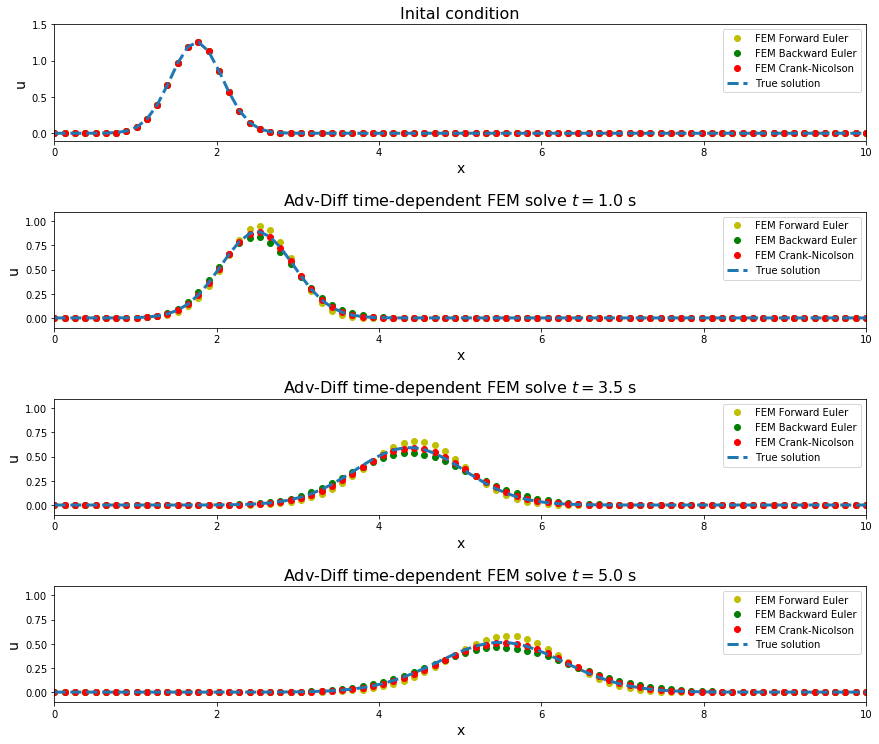

In [122]:
# Paramaters
Lx = 10.
kappa = 0.05
U = 0.75
N_nodes_CG = 80
dx = Lx/N_nodes_CG
dt = 0.05
t_start = 1
t_end_list = [1, 2, 4.5, 6]
theta = 0.5

CFL = U*dt/dx < 1
PE_C = U*dx/kappa < 2
R = kappa*dt/(dx**2) < 0.5

print('Are Stability conditions satisfied: ')
print(f'CFL:  {CFL}')
print(f'Pe_c: {PE_C}')
print(f'r:    {R}')

#set up figure
fig, axs = plt.subplots(4, 1, figsize=(12, 10))
axs = axs.reshape(-1)
fig.tight_layout(w_pad=4, h_pad=5)


for i, t_end in enumerate(t_end_list):
    u_fea_f, x_nodes, t_end_fea = FEA_advection_diffusion(N_nodes_CG, dt, t_start, t_end, 0)
    u_fea_b, x_nodes, t_end_fea = FEA_advection_diffusion(N_nodes_CG, dt, t_start, t_end, 1)
    u_fea_cn, x_nodes, t_end_fea = FEA_advection_diffusion(N_nodes_CG, dt, t_start, t_end, 0.5)
    solution_u = adv_diff_analytical_solution(U, kappa, 1, x_nodes, t_end)
    axs[i].plot(x_nodes, u_fea_f, 'yo', linewidth=0.01, label='FEM Forward Euler')
    axs[i].plot(x_nodes, u_fea_b, 'go', linewidth=0.01, label='FEM Backward Euler')
    axs[i].plot(x_nodes, u_fea_cn, 'ro', linewidth=0.01, label='FEM Crank-Nicolson')
    axs[i].plot(x_nodes, solution_u, '--', linewidth=3, markersize=4, label='True solution')
    axs[i].legend(loc='best')
    axs[i].set_xlim(0.0, 10.0)
    axs[i].set_ylim(-0.1,1.1)
    axs[i].set_xlabel('x', fontsize=14)
    axs[i].set_ylabel('u', fontsize=14)
    axs[i].set_title('Adv-Diff time-dependent FEM solve $t=${0:.1f} s'.format(t_end-t_start), fontsize=16) 
    if i == 0:
        axs[i].set_title('Inital condition'.format(t_end-t_start), fontsize=16)   
        axs[i].set_ylim(-0.1,1.5)


  

The plot above shows how the three time stepping methods advect and diffuse the initial spike. They show similar behaviour as in the Finite Difference Method (FDM), the Forward Euler FEM underpredicts the diffusion while the backwards Euler method is too diffusive. The Crank-Nicolson seems to be a good approximation of the solution. 

##  Q3.2 Convergence of nodal errors

First, the temporal convergence is being investigated. To ensure that the Forward Euler method is stable, the N and dt parameters of the first point (with the largest dt) are chosen such that the R parameter is in stable region. Every following point will have a smaller dt and therefore will also be stable. 

In [125]:
Lx = 10.
kappa = 0.007
U = 0.5
N = 400
dx = Lx/N
dt = 0.04
print('First iteration stability conditions: ')
print('CFL:  {0:.2f}'.format(U*dt/dx))
print('Pe_c: {0:.2f}'.format(U*dx/kappa))
print('r:    {0:.2f}'.format(kappa*dt/(dx**2)))

print('Last iteration stability conditions: ')
dt = 5.e-4
print('CFL:  {0:.2f}'.format(U*dt/dx))
print('Pe_c: {0:.2f}'.format(U*dx/kappa))
print('r:    {0:.2f}'.format(kappa*dt/(dx**2)))

First iteration stability conditions: 
CFL:  0.80
Pe_c: 1.79
r:    0.45
Last iteration stability conditions: 
CFL:  0.01
Pe_c: 1.79
r:    0.01


The Forward Euler method will be stable for N = 400 and dt = 0.04. The N had be choosen as large as possible to ensure that the spatial error is small. 

Text(0.5, 1.0, 'dt convergence plot (constant dx)')

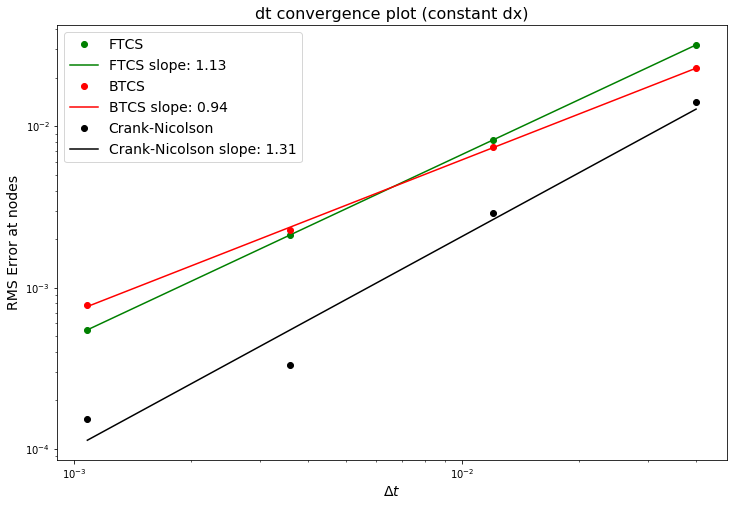

In [194]:
##### dt convergence plots ####
#Paramaters
Lx = 10.
kappa = 0.007
U = 0.5
N_nodes_CG = 400
dt = 0.04
t_start = 2
t_end = 2.5

#initialize lists for errors and dt
error_array_FEA_FTCS = []
error_array_FEA_BTCS = []
error_array_FEA_CN = []
dt_array = []


#calculate with smaller dt every step
while dt > 5.e-4:
    #solve the ODE with the three methods
    u_fea_FTCS, x_nodes, t_end_fea = FEA_advection_diffusion(N_nodes_CG, dt, t_start, t_end, 0)
    u_fea_BTCS, x_nodes, t_end_fea = FEA_advection_diffusion(N_nodes_CG, dt, t_start, t_end, 1)
    u_fea_CN, x_nodes, t_end_fea = FEA_advection_diffusion(N_nodes_CG, dt, t_start, t_end, 0.5)
    #find true solution
    solution_u = adv_diff_analytical_solution(U, kappa, 1, x_nodes, t_end)
    #use linalg.norm to find error and append to list
    error_array_FEA_FTCS.append(sl.norm(u_fea_FTCS - solution_u)/np.sqrt(len(solution_u)))
    error_array_FEA_BTCS.append(sl.norm(u_fea_BTCS - solution_u)/np.sqrt(len(solution_u)))
    error_array_FEA_CN.append(sl.norm(u_fea_CN - solution_u)/np.sqrt(len(solution_u)))
    dt_array.append(dt)
    #decease timestep
    dt *= 0.3
    
    
#calculating linear fit  
line_fit_FTCS = np.polyfit(np.log(dt_array), np.log(error_array_FEA_FTCS), 1)
line_fit_BTCS = np.polyfit(np.log(dt_array), np.log(error_array_FEA_BTCS), 1)
line_fit_CN = np.polyfit(np.log(dt_array), np.log(error_array_FEA_CN), 1)

#plot solution
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))
ax1.loglog(dt_array, error_array_FEA_FTCS, 'go', label= 'FTCS')
ax1.loglog(dt_array, np.exp(line_fit_FTCS[1]) * dt_array**(line_fit_FTCS[0]), 'g-', label= 'FTCS slope: {:.2f}'.format(line_fit_FTCS[0]))
ax1.loglog(dt_array, error_array_FEA_BTCS, 'ro', label= 'BTCS')
ax1.loglog(dt_array, np.exp(line_fit_BTCS[1]) * dt_array**(line_fit_BTCS[0]), 'r-', label= 'BTCS slope: {:.2f}'.format(line_fit_BTCS[0]))
ax1.loglog(dt_array, error_array_FEA_CN, 'ko', label= "Crank-Nicolson")
ax1.loglog(dt_array, np.exp(line_fit_CN[1]) * dt_array**(line_fit_CN[0]), 'k-', label= 'Crank-Nicolson slope: {:.2f}'.format(line_fit_CN[0]))
ax1.legend(loc='best', fontsize=14)
ax1.set_xlabel('$\Delta t$', fontsize=14)
ax1.set_ylabel('RMS Error at nodes', fontsize=14)
ax1.set_title('dt convergence plot (constant dx)', fontsize=16)

The theorical temporal convergence of the Backward and Forward Euler method is one (lecture 6 [1]), this is confirmed in the plot above. The Crank-Nicolson method should be second order accurate but in the above it only shows a convergence of 1.31. There are the same three issues as in the FDM (Q 2.2) that might be the reason for this but this time it is difficult to rule out a bug in the code. There might either be a bug in the FEM solver or the appropriate values for the second order convergence were not found since it might require very small dx values. 

# dx convergence

In [130]:
Lx = 3.
kappa = 0.007
U = 0.5
Nx_nodes_CG = 110
dt = 0.00001
dx = Lx/Nx_nodes_CG
print('First iteration stability conditions: ')
print('CFL:  {0:.2f}'.format(U*dt/dx))
print('Pe_c: {0:.2f}'.format(U*dx/kappa))
print('r:    {0:.2f}'.format(kappa*dt/(dx**2)))

print('Last iteration stability conditions: ')
Nx_nodes_CG = 400
dx = Lx/Nx_nodes_CG
print('CFL:  {0:.2f}'.format(U*dt/dx))
print('Pe_c: {0:.2f}'.format(U*dx/kappa))
print('r:    {0:.2f}'.format(kappa*dt/(dx**2)))

First iteration stability conditions: 
CFL:  0.00
Pe_c: 1.95
r:    0.00
Last iteration stability conditions: 
CFL:  0.00
Pe_c: 0.54
r:    0.00


The spatial convergence is second order for all three methods (lecture 11&12 [1]), therefore a small dt (dt = $10^{-5}$) is required to ensure that the spatial error is dominant even for small dx values.

Text(0.5, 1.0, 'Delta x convergence plot at nodes (constant dt)')

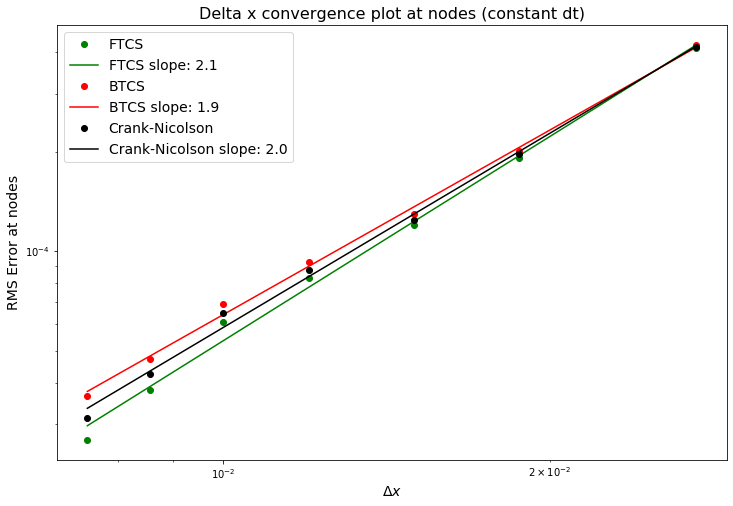

In [149]:
##### dx convergence plots ####
#Paramaters
Lx = 3.
kappa = 0.007
U = 0.5
N = [110, 160, 200, 250, 300, 350, 400]
dt = 0.00001
t_start = 1
t_end = 1.1

#initialize lists for errors and dt
error_dx_array_FEA_FTCS = []
error_dx_array_FEA_BTCS = []
error_dx_array_FEA_CN = []
dx_array = []

dx = Lx / Nx_nodes_CG


#calculate with smaller dt every step
for Nx_nodes_CG in N:
    dx = Lx / Nx_nodes_CG
    #solve the ODE with the three methods
    dx_fea_FTCS, x_nodes, t_end_fea = FEA_advection_diffusion(Nx_nodes_CG, dt, t_start, t_end, 0)
    dx_fea_BTCS, x_nodes, t_end_fea = FEA_advection_diffusion(Nx_nodes_CG, dt, t_start, t_end, 1)
    dx_fea_CN, x_nodes, t_end_fea = FEA_advection_diffusion(Nx_nodes_CG, dt, t_start, t_end, 0.5)
    #find true solution
    solution_u = adv_diff_analytical_solution(U, kappa, 1, x_nodes, t_end)
    #use linalg.norm to find error and append to list
    error_dx_array_FEA_FTCS.append(RMS(dx_fea_FTCS, solution_u))
    error_dx_array_FEA_BTCS.append(RMS(dx_fea_BTCS, solution_u))
    error_dx_array_FEA_CN.append(RMS(dx_fea_CN, solution_u))
    dx_array.append(dx)
    #decease timestep
    


#calculating linear fit  
line_dx_fit_FTCS = np.polyfit(np.log(dx_array), np.log(error_dx_array_FEA_FTCS), 1)
line_dx_fit_BTCS = np.polyfit(np.log(dx_array), np.log(error_dx_array_FEA_BTCS), 1)
line_dx_fit_CN = np.polyfit(np.log(dx_array), np.log(error_dx_array_FEA_CN), 1)

#plot solution
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))
ax1.loglog(dx_array, error_dx_array_FEA_FTCS, 'go', label= 'FTCS')
ax1.loglog(dx_array, np.exp(line_dx_fit_FTCS[1]) * dx_array**(line_dx_fit_FTCS[0]), 'g-', label= 'FTCS slope: {:.1f}'.format(line_dx_fit_FTCS[0]))
ax1.loglog(dx_array, error_dx_array_FEA_BTCS, 'ro', label= 'BTCS')
ax1.loglog(dx_array, np.exp(line_dx_fit_BTCS[1]) * dx_array**(line_dx_fit_BTCS[0]), 'r-', label= 'BTCS slope: {:.1f}'.format(line_dx_fit_BTCS[0]))
ax1.loglog(dx_array, error_dx_array_FEA_CN, 'ko', label= "Crank-Nicolson")
ax1.loglog(dx_array, np.exp(line_dx_fit_CN[1]) * dx_array**(line_dx_fit_CN[0]), 'k-', label= 'Crank-Nicolson slope: {:.1f}'.format(line_dx_fit_CN[0]))
ax1.legend(loc='best', fontsize=14)
ax1.set_xlabel('$\Delta x$', fontsize=14)
ax1.set_ylabel('RMS Error at nodes', fontsize=14)
ax1.set_title('Delta x convergence plot at nodes (constant dt)', fontsize=16)

The plot above confirmed that for the node values all the methods are second order accurate in space. 

## Q3.3 Convergence over element error

In the convergence analysis above, only the nodes of the Finite Element are being considered but it also imporanat to consider the error inbetween the nodes. A picewise linear element is drawn between every node and the RMS error is calcauted for a much finer mesh. This is an apprxomaiation of the $L_2$ norm. The convergence over the linear elements is shown below.  

In [151]:
#code is taken from [1]
def hat_function(i, x_nodes):
    """ Linear continuous basis function at node i.
    Returns a function for later use in quadrature rules.
    """
    assert(i>=0 and i<=len(x_nodes)-1)
    dx = np.diff(x_nodes)
    if i==0:
        hat = lambda x: np.select([ x<=x_nodes[i+1] ], [ (x_nodes[i+1] - x)/dx[i] ] ,0.0)
    elif i==len(x_nodes)-1:
        hat = lambda x: np.select([ x>=x_nodes[i-1] ], [ (x - x_nodes[i-1])/dx[i-1] ] ,0.0)
    else:
        hat = lambda x: np.select(
                [ np.all([[x>=x_nodes[i-1]],[x<=x_nodes[i]]], axis=0)[0],  
                  np.all([[x>=x_nodes[i]],[x<=x_nodes[i+1]]], axis=0)[0]] ,
                [ (x-x_nodes[i-1])/dx[i-1], (x_nodes[i+1]-x)/dx[i] ] ,0.0)
    return hat


def pwlinear(x_nodes, y_nodes, x):
    """Function to return f_h(x) at locations given in x, 
    with top hat functions on a mesh given by x_nodes, and
    corresponding weights given in y_nodes.
    """
    val = np.zeros_like(x)
    # loop over x values, equivalently the basis functions
    for i in range(len(x)):
        # which mesh node is directly to the left of x[i] ?
        node = np.where( x[i] >= x_nodes )[0][-1]

        # because of the greater than or equals above, deal with problem of hitting last node
        node = np.minimum(len(x_nodes)-2,node)

        # add together the contributions from the two hat functions at this x location - 
        # the hat functions centred on "node" (to the left)
        phi_node = hat_function(node, x_nodes)

        # and "node+1" (to the right)
        phi_node_plus_1 = hat_function(node+1, x_nodes)

        # now take the weighted sum of these two hat functions
        val[i] = y_nodes[node]*phi_node(x[i]) + y_nodes[node+1]*phi_node_plus_1(x[i])

    return val

Text(0.5, 1.0, 'Delta x convergence plot (constant dt)')

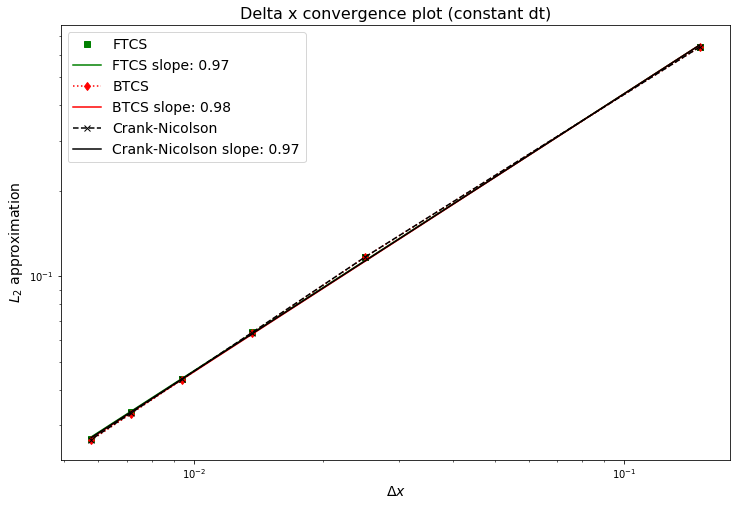

In [153]:
#Paramaters
Lx = 3.
kappa = 0.007
U = 0.5
Nx_nodes_CG = 20
dt = 0.0005
t_start = 1
t_end = 1.2
N_loc = 2
N_gi = 3

#initialize lists for errors and dt
error_dx_FTCS = []
error_dx_BTCS = []
error_dx_CN = []
dx_array = []

dx = Lx / Nx_nodes_CG


#calculate with smaller dt every step
while dx > 6.e-3:
    dx = Lx / Nx_nodes_CG
    #solve the ODE with the three methods
    dx_fea_FTCS, x_nodes, t_end_fea = FEA_advection_diffusion(Nx_nodes_CG, dt, t_start, t_end, 0)
    dx_fea_BTCS, x_nodes, t_end_fea = FEA_advection_diffusion(Nx_nodes_CG, dt, t_start, t_end, 1)
    dx_fea_CN, x_nodes, t_end_fea = FEA_advection_diffusion(Nx_nodes_CG, dt, t_start, t_end, 0.5)
    #find true solution
    x_error_mesh = np.linspace(x_nodes[1],x_nodes[-2],100)
    solution_u = adv_diff_analytical_solution(U, kappa, 1, x_error_mesh, t_end_fea)
    #use linalg.norm to find error and append to list
    error_dx_FTCS.append(RMS(pwlinear(x_nodes[1:-1], dx_fea_FTCS, x_error_mesh), solution_u))
    error_dx_BTCS.append(RMS(pwlinear(x_nodes[1:-1], dx_fea_BTCS, x_error_mesh), solution_u))
    error_dx_CN.append(RMS(pwlinear(x_nodes[1:-1], dx_fea_CN, x_error_mesh), solution_u))
    dx_array.append(dx)
    #decease timestep
    Nx_nodes_CG += 100
    


#calculating linear fit  
line_dx_fit_FTCS = np.polyfit(np.log(dx_array), np.log(error_dx_FTCS), 1)
line_dx_fit_BTCS = np.polyfit(np.log(dx_array), np.log(error_dx_BTCS), 1)
line_dx_fit_CN = np.polyfit(np.log(dx_array), np.log(error_dx_CN), 1)

#plot solution
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))
ax1.loglog(dx_array, error_dx_FTCS, 'gs', label= 'FTCS')
ax1.loglog(dx_array, np.exp(line_dx_fit_FTCS[1]) * dx_array**(line_dx_fit_FTCS[0]), 'g-', label= 'FTCS slope: {:.2f}'.format(line_dx_fit_FTCS[0]))
ax1.loglog(dx_array, error_dx_BTCS, 'rd:', label= 'BTCS')
ax1.loglog(dx_array, np.exp(line_dx_fit_BTCS[1]) * dx_array**(line_dx_fit_BTCS[0]), 'r-', label= 'BTCS slope: {:.2f}'.format(line_dx_fit_BTCS[0]))
ax1.loglog(dx_array, error_dx_CN, 'kx--', label= "Crank-Nicolson")
ax1.loglog(dx_array, np.exp(line_dx_fit_CN[1]) * dx_array**(line_dx_fit_CN[0]), 'k-', label= 'Crank-Nicolson slope: {:.2f}'.format(line_dx_fit_CN[0]))
ax1.legend(loc='best', fontsize=14)
ax1.set_xlabel('$\Delta x$', fontsize=14)
ax1.set_ylabel('$L_2$ approximation', fontsize=14)
ax1.set_title('Delta x convergence plot (constant dt)', fontsize=16)

The plot above shows a first order convergence for the piecewise linear numerical approximation. This is surprising since the nodal error converges at second order and the piecewise linear elements are a second order approximation as well. A reason for this might because the nodal values are only second order accurate and a further approximation between the nodal value will combine the error from nodal values and the piecewise linear numerical approximation. This can lead to a convergence which is lower than the individual convergence. It is also possible that there is a bug in the code that prevents a correct convergence. 

## Q3.4 Finite Element Method (FEM) vs Finite Difference Method (FDM)

Firstly, the accuracy of both methods is compared when the same timestep size and dx are used. For this a range of values are tested below. For each method and parameter set, the RMS norm is calculated and the RMS norms of both methods are compared by calculating the percentage difference  of the two RMS norms.

$$ E = 100\frac{RMS(FDM) - RMS(FEM)}{RMS(FDM) }$$

A positive E percentage means that the RMS value for the FEM method is smaller, meaning that the FEM method is more accurate. If the E percentage is negative, the Finite Difference method is more accurate. The E percentage will give the percentage difference between the two RMS norms. The E percentage will be calculated for the Forward Difference, Backward Difference and Crank-Nicolson.

In [29]:
#Set parameters
U = 1
kappa = 1./100.
N = [70, 150, 250, 350, 500, 600] #list of number of nodes tested
L = 10.
Lx = L
dt = [0.1, 0.05, 0.01, 0.005, 0.0005, 0.0005] #list of used dt values
t_start = 1.
t_end = t_start + 1
x0 = 1

print('E Percentage difference of the RMS norm for are:')

for i in range(len(N)):
    #Use Finite Difference method to find solution
    C_FTCS, x_FTCS, t_FTCS = theat_method(N[i], dt[i], t_start, t_end, U, kappa, 0)
    C_BTCS, x_BTCS, t_BTCS = theat_method(N[i], dt[i], t_start, t_end, U, kappa, 1)
    C_CN, x_CN, t_CN = theat_method(N[i], dt[i], t_start, t_end, U, kappa, 0.5)

    #Use FEM to find solution
    u_fea_FT, x_nodes_FT, t_end_FT = FEA_advection_diffusion(N[i], dt[i], t_start, t_end, 0)
    u_fea_BT, x_nodes_BT, t_end_BT = FEA_advection_diffusion(N[i], dt[i], t_start, t_end, 1)
    u_fea_CN, x_nodes_CN, t_end_CN = FEA_advection_diffusion(N[i], dt[i], t_start, t_end, 0.5)

    #Find real solution
    solution_u = adv_diff_analytical_solution(U, kappa, 1, x_nodes_CN, t_end)

    #Calculate the percentage difference between the RMS errors of both solutions 
    percent_FTCS_FT = 100*(RMS(solution_u,C_FTCS[:,-1]) - RMS(solution_u,u_fea_FT))/(RMS(solution_u,C_FTCS[:,-1]))
    percent_BTCS_BT = 100*(RMS(solution_u,C_BTCS[:,-1]) - RMS(solution_u,u_fea_BT))/(RMS(solution_u,C_BTCS[:,-1]))
    percent_CNCS_CN = 100*(RMS(solution_u,C_CN[:,-1]) - RMS(solution_u,u_fea_CN))/(RMS(solution_u,C_CN[:,-1]))

    #print out the percentage differnces 
    print(f"""N = {N[i]}, dt = {dt[i]}:
    Forward Euler: {percent_FTCS_FT:3.2f} %, Backward Euler: {percent_BTCS_BT:3.2f} %, CN: {percent_CNCS_CN:3.2f} %""")

E Percentage difference of the RMS norm for are:
N = 70, dt = 0.1:
    Forward Euler: -222.90 %, Backward Euler: 22.41 %, CN: 77.04 %
N = 150, dt = 0.05:
    Forward Euler: -99.98 %, Backward Euler: 15.00 %, CN: 87.41 %
N = 250, dt = 0.01:
    Forward Euler: 10.10 %, Backward Euler: 16.29 %, CN: 96.35 %
N = 350, dt = 0.005:
    Forward Euler: 2.67 %, Backward Euler: 12.31 %, CN: 41.74 %
N = 500, dt = 0.0005:
    Forward Euler: 39.27 %, Backward Euler: 42.19 %, CN: 76.92 %
N = 600, dt = 0.0005:
    Forward Euler: 20.01 %, Backward Euler: 29.22 %, CN: 66.48 %


The three time stepping methods used are the same for the FEM and FDM, therefore the order of convergence is the same for the individual methods. However, as seen above, it seems like the FEM is significantly more accurate than the FDM for the Backwards Euler and Crank-Nicolson method. The FEM Backwards Euler gets increasingly more accurate than the FDM as the timestep and mesh size is refined. The FEM C-N method is always at least 40% more accurate than the FDM C-N  even for small system with large timesteps. 
The FEM Forward Euler method is unstable and blows up for small systems with large timesteps whereas the FDM FTCS method is also unstable, but it does not blow up. This means that for smaller systems the FDM FTCS method is theoretically more accurate, but its results are also not reliable. As the system gets bigger, the FEM Forward Euler method gets more accurate and surpasses the accuracy of the FDM for a medium system. 

This analysis shows that the FEM is more accurate, especially for systems with a small dt and dx values. 

Secondly the time it takes to run each method is considered. The run time of the solvers depends mostly on the number of nodes and timestep size and less on what parts of the time stepping discretization matrix is included, therefore only the Crank-Nicolson method is considered below. The other two time stepping methods will show similar results.

Text(0.5, 1.0, 'Run time comparsion')

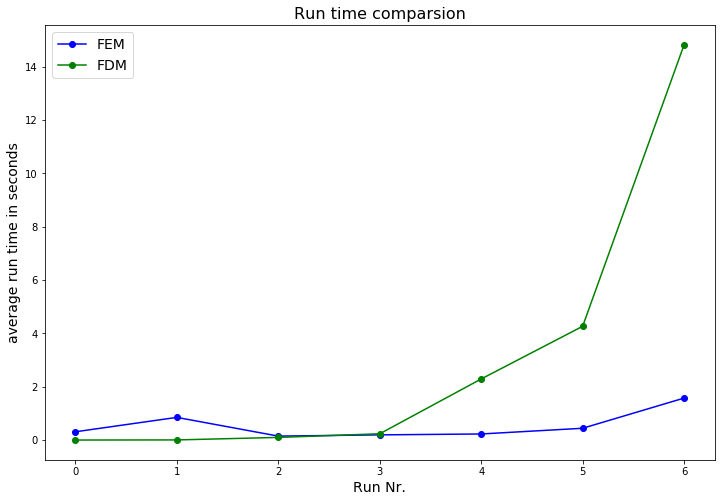

In [154]:
#set Parameters
U = 1
kappa = 1./100.
N = [70, 120, 250, 350, 500, 700, 900] #list of number of nodes tested
L = 10.
Lx = L
dt = [0.1, 0.07, 0.01, 0.01, 0.005, 0.005, 0.0025] #list of used dt values
t_start = 1.
t_end = t_start + 1
x0 = 1

#create lists to store timings 
timeings_FEM = []
timeings_FDM = []

#loop over the six test cases
for i in range(len(N)):
    # use %timeit to find the run time [4]
    FDM_t = %timeit -n1 -r4 -o -q theat_method(N[i], dt[i], t_start, t_end, U, kappa, 0.5)
    FEM_t = %timeit -n1 -r4 -o -q FEA_advection_diffusion(N[i], dt[i], t_start, t_end, 0.5)
    # save the average run time in the lists
    timeings_FEM.append(FEM_t.average)
    timeings_FDM.append(FDM_t.average)

# plot the timings for both tests
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))
ax1.plot(range(0,len(N)), timeings_FEM, 'bo-', label= 'FEM')
ax1.plot(range(0,len(N)), timeings_FDM, 'go-', label= 'FDM')  
ax1.legend(loc='best', fontsize=14)
ax1.set_xlabel('Run Nr.', fontsize=14)
ax1.set_ylabel('average run time in seconds', fontsize=14)
ax1.set_title('Run time comparsion', fontsize=16)

The graph above shows the runtime for the FEM and FDM and it clearly shows that the FDM is faster for smaller systems up to N = 350 and dt = 0.01. After this the FEM is faster and the differnce between the two solver grows with larger systems being solver. The main factor that makes FDM takes longer is the linear solver that is being used. The FEM is using a ittertaive solver which is faster for larger systems but for small systems the inital cost of the FEM outweighs the speed up in the timestepping and therefore it is slower of small systems. If a faster solver could be used for the FDM than it might be faster even for larger systems but for this problem no faster linear solver was found. In addition to this, the FDM solver stores every timestep in a matrix rather than just storing the last timestep, this might have an impact on the performance as well.  


The choice between the two methods depends on the application. If the solution needs to be obtained quickly and a low accuracy is acceptable than the FDM with Crank-Nicolson is the best choice. However, if an accurate solution is required, a large system needs to be solved therefore the FEM C-N is the better choice.

References

[1] M. Piggott, ACSE-3 Numerical Methods, (2020), GitHub repository and Lecture notes, https://github.com/acse-2020/ACSE-3


[2] Sharma, Dinkar & Jiwari, Dr Ram & Kumar, Sheo. (2011). Galerkin-finite element method for the numerical solution of advection-diffusion equation. International Journal of Pure and Applied Mathematics. 70. 389-399. 

[3] denis, 2015. Recommended Direct Solver For Sparse Positive Definite Linear System In Scipy?. [online] Stack Overflow. Available at: <https://stackoverflow.com/questions/17962403/recommended-direct-solver-for-sparse-positive-definite-linear-system-in-scipy> [Accessed 6 January 2021].


[4] Dunes, 2018. How To Store %%Time Values In A Variable In Jupyter?. [online] Stack Overflow. Available at: <https://stackoverflow.com/questions/52738709/how-to-store-time-values-in-a-variable-in-jupyter>